## Finpro Stage 1 - EDA - Application Train - Partition num1 and num2

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  2.2.2
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [ ]:
# Load the data from the CSV file
data = pd.read_csv("application_train.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())


First few rows of the dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Descriptive Statistics

In [ ]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Pendekatan Numerik

In [ ]:
# Pengelompokan kolom numerik dari dataset application_train
num1 = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
        'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
        'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT']
num2 =['TARGET', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG']


In [ ]:
# Menampilkan 5 baris pertama dari kolom-kolom yang ada di num1
data[num1].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,2
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,1
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,2
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,2.0,2
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1.0,2


In [ ]:
data[num1].describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,2.152665,2.052463
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.910682,0.509034
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,2.000000,2.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,2.000000,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,3.000000,2.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,20.000000,3.000000


In [ ]:
# Menampilkan 5 baris pertama dari kolom-kolom yang ada di num2
data[num2].head()

,TARGET,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG
0,1,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722
1,0,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851
2,0,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN
3,0,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN
4,0,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN


In [ ]:
data[num2].describe()

,TARGET,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000
mean,0.080729,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735
std,0.272419,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000
25%,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700
50%,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505998,5.659614e-01,0.535276,0.08760,0.076300,0.981600
75%,0.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675053,6.636171e-01,0.669057,0.14850,0.112200,0.986600
max,1.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,8.549997e-01,0.896010,1.00000,1.000000,1.000000


### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [ ]:
#Jumlah data yang null
data[num1].isna().sum()

TARGET                             0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
dtype: int64

In [ ]:
# Hitung persentase missing value
missing_percentage = data[num1].isna().mean() * 100

# Menampilkan persentase missing value
print("Persentase Missing Value (%):")
print(missing_percentage)

# Loop untuk melakukan tindakan sesuai kriteria yang ditentukan
for col, pct in missing_percentage.items():
    if pct == 0:
        continue  # Tidak ada missing value, tidak melakukan apa-apa
    elif pct <= 5:
        # Drop baris yang memiliki missing value pada kolom ini
        data = data.dropna(subset=[col])
        print(f"Drop rows with missing values in column: {col} (Missing: {pct:.2f}%)")
    elif 5 < pct <= 20:
        # Mengisi missing value dengan median dari kolom tersebut
        median_value = data[col].median()
        data[col] = data[col].fillna(median_value)
        print(f"Fill missing values in column: {col} with median value (Missing: {pct:.2f}%)")
    else:
        # Drop kolom jika missing value lebih dari 20%
        data = data.drop(columns=[col])
        print(f"Drop column: {col} (Missing: {pct:.2f}%)")

# Tampilkan hasil akhir setelah penanganan missing value
display(data.head())


Persentase Missing Value (%):
TARGET                         0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
dtype: float64
Drop rows with missing values in column: AMT_ANNUITY (Missing: 0.00%)
Drop rows with missing values in column: AMT_GOODS_PRICE (Missing: 0.09%)
Drop column: OWN_CAR_AGE (Missing: 65.99%)
Drop rows with missing values in column: CNT_FAM_MEMBERS (Missing: 0.00%)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Jumlah data yang null
data[num2].isna().sum()

TARGET                              0
REGION_RATING_CLIENT_W_CITY         0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
EXT_SOURCE_1                   173230
EXT_SOURCE_2                      659
EXT_SOURCE_3                    60896
APARTMENTS_AVG                 155902
BASEMENTAREA_AVG               179762
YEARS_BEGINEXPLUATATION_AVG    149856
dtype: int64

In [ ]:
# Hitung persentase missing value
missing_percentage = data[num2].isna().mean() * 100

# Menampilkan persentase missing value
print("Persentase Missing Value (%):")
print(missing_percentage)

# Loop untuk melakukan tindakan sesuai kriteria yang ditentukan
for col, pct in missing_percentage.items():
    if pct == 0:
        continue  # Tidak ada missing value, tidak melakukan apa-apa
    elif pct <= 5:
        # Drop baris yang memiliki missing value pada kolom ini
        data = data.dropna(subset=[col])
        print(f"Drop rows with missing values in column: {col} (Missing: {pct:.2f}%)")
    elif 5 < pct <= 20:
        # Mengisi missing value dengan median dari kolom tersebut
        median_value = data[col].median()
        data[col] = data[col].fillna(median_value)
        print(f"Fill missing values in column: {col} with median value (Missing: {pct:.2f}%)")
    else:
        # Drop kolom jika missing value lebih dari 20%
        data = data.drop(columns=[col])
        print(f"Drop column: {col} (Missing: {pct:.2f}%)")

# Tampilkan hasil akhir setelah penanganan missing value
display(data.head())


Persentase Missing Value (%):
TARGET                          0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
EXT_SOURCE_1                   56.386119
EXT_SOURCE_2                    0.214504
EXT_SOURCE_3                   19.821562
APARTMENTS_AVG                 50.745880
BASEMENTAREA_AVG               58.512276
YEARS_BEGINEXPLUATATION_AVG    48.777916
dtype: float64
Drop column: EXT_SOURCE_1 (Missing: 56.39%)
Drop rows with missing values in column: EXT_SOURCE_2 (Missing: 0.21%)
Fill missing values in column: EXT_SOURCE_3 with median value (Missing: 19.82%)
Drop column: APARTMENTS_AVG (Missing: 50.75%)
Drop column: BASEMENTAREA_AVG (Missing: 58.51%)
Drop column: YEARS_BEGINEXPLUATATION_AVG (Missing: 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

### Analisis Nilai Aneh pada `num1`:
1. **Kolom `CNT_CHILDREN`**:
   - **Max**: 19.
   - Ini menunjukkan bahwa ada nasabah yang memiliki hingga 19 anak. Jumlah ini tampak tidak wajar dan bisa jadi anomali, karena jarang ada keluarga yang memiliki anak sebanyak itu.

2. **Kolom `AMT_INCOME_TOTAL`**:
   - **Min**: 25,650.
   - **Max**: 117,000,000.
   - Nilai maksimum `117,000,000` tampak terlalu besar untuk pendapatan individu, yang mungkin merupakan kesalahan data atau outlier.

3. **Kolom `DAYS_EMPLOYED`**:
   - **Min**: -17,912 (negatif menunjukkan jumlah hari sejak lahir).
   - **Max**: 365,243.
   - Nilai maksimum `365,243` tampak sangat aneh, karena ini setara dengan hampir 1000 tahun (365243/365 ≈ 1000 tahun). Ini menunjukkan adanya entri data yang tidak valid, dan bisa dipertimbangkan untuk dihapus atau diganti dengan nilai yang lebih realistis.

4. **Kolom `OWN_CAR_AGE`**:
   - **Min**: 0.
   - **Max**: 91.
   - Nilai maksimum `91` menunjukkan umur mobil, dan tampaknya tidak realistis untuk mobil berumur lebih dari 90 tahun. Ini mungkin merupakan kesalahan data atau entri tidak valid.

5. **Kolom `CNT_FAM_MEMBERS`**:
   - **Min**: 1.
   - **Max**: 20.
   - Nilai maksimum `20` menunjukkan jumlah anggota keluarga. Jumlah ini mungkin bisa diterima, tetapi patut dicurigai jika terdapat banyak entri dengan jumlah anggota keluarga yang sangat besar.

### Analisis Nilai Aneh pada `num2`:
1. **Kolom `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3`**:
   - Nilai minimum yang sangat kecil (hingga 0.0000000817) dan nilai maksimum (0.962693) bisa menunjukkan skala yang terlalu kecil untuk nilai sumber eksternal. Perlu dicek apakah ini sudah sesuai dengan definisi dan rentang nilai yang benar.

2. **Kolom `REGION_RATING_CLIENT_W_CITY` dan `REGION_RATING_CLIENT`**:
   - Nilai minimum `1` dan maksimum `3` menunjukkan bahwa ini adalah nilai kategorikal yang mungkin terkait dengan rating wilayah. Tidak ada anomali di sini, namun penting untuk memahami interpretasi dari setiap rating.

3. **Kolom `YEARS_BEGINEXPLUATATION_AVG`**:
   - Nilai minimum `0` dan maksimum `1`.
   - Ini menunjukkan bahwa mungkin rentang nilai ini adalah skala normalisasi (0 hingga 1). Namun, jika tidak ada interpretasi yang jelas, maka nilai minimum `0` bisa dianggap sebagai anomali.

### Rekomendasi Tindakan:
1. **Lakukan *Data Cleaning* untuk `DAYS_EMPLOYED`**:
   - Ubah nilai `DAYS_EMPLOYED` yang tidak realistis (seperti 365243) menjadi `NaN` atau nilai median dari kolom tersebut.

2. **Periksa *Outliers* pada `AMT_INCOME_TOTAL`**:
   - Lakukan *visualization* seperti *boxplot* untuk memeriksa outliers pada `AMT_INCOME_TOTAL` dan tentukan batasan atas yang wajar.

3. **Periksa Jumlah Anak (`CNT_CHILDREN`)**:
   - Periksa distribusi jumlah anak dan tentukan apakah nilai maksimum (19) adalah entri yang valid atau tidak.

4. **Ganti atau Buang Entri yang Tidak Valid**:
   - Ganti nilai anomali seperti `OWN_CAR_AGE` (jika > 90 tahun) dengan `NaN` atau nilai rata-rata, atau hapus baris-baris tersebut jika jumlahnya kecil dan tidak akan mempengaruhi analisis secara keseluruhan.

Apakah ada tindakan atau analisis tambahan yang ingin Anda lakukan terhadap data ini? Saya dapat membantu dengan memberikan kode tambahan jika diperlukan.

# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

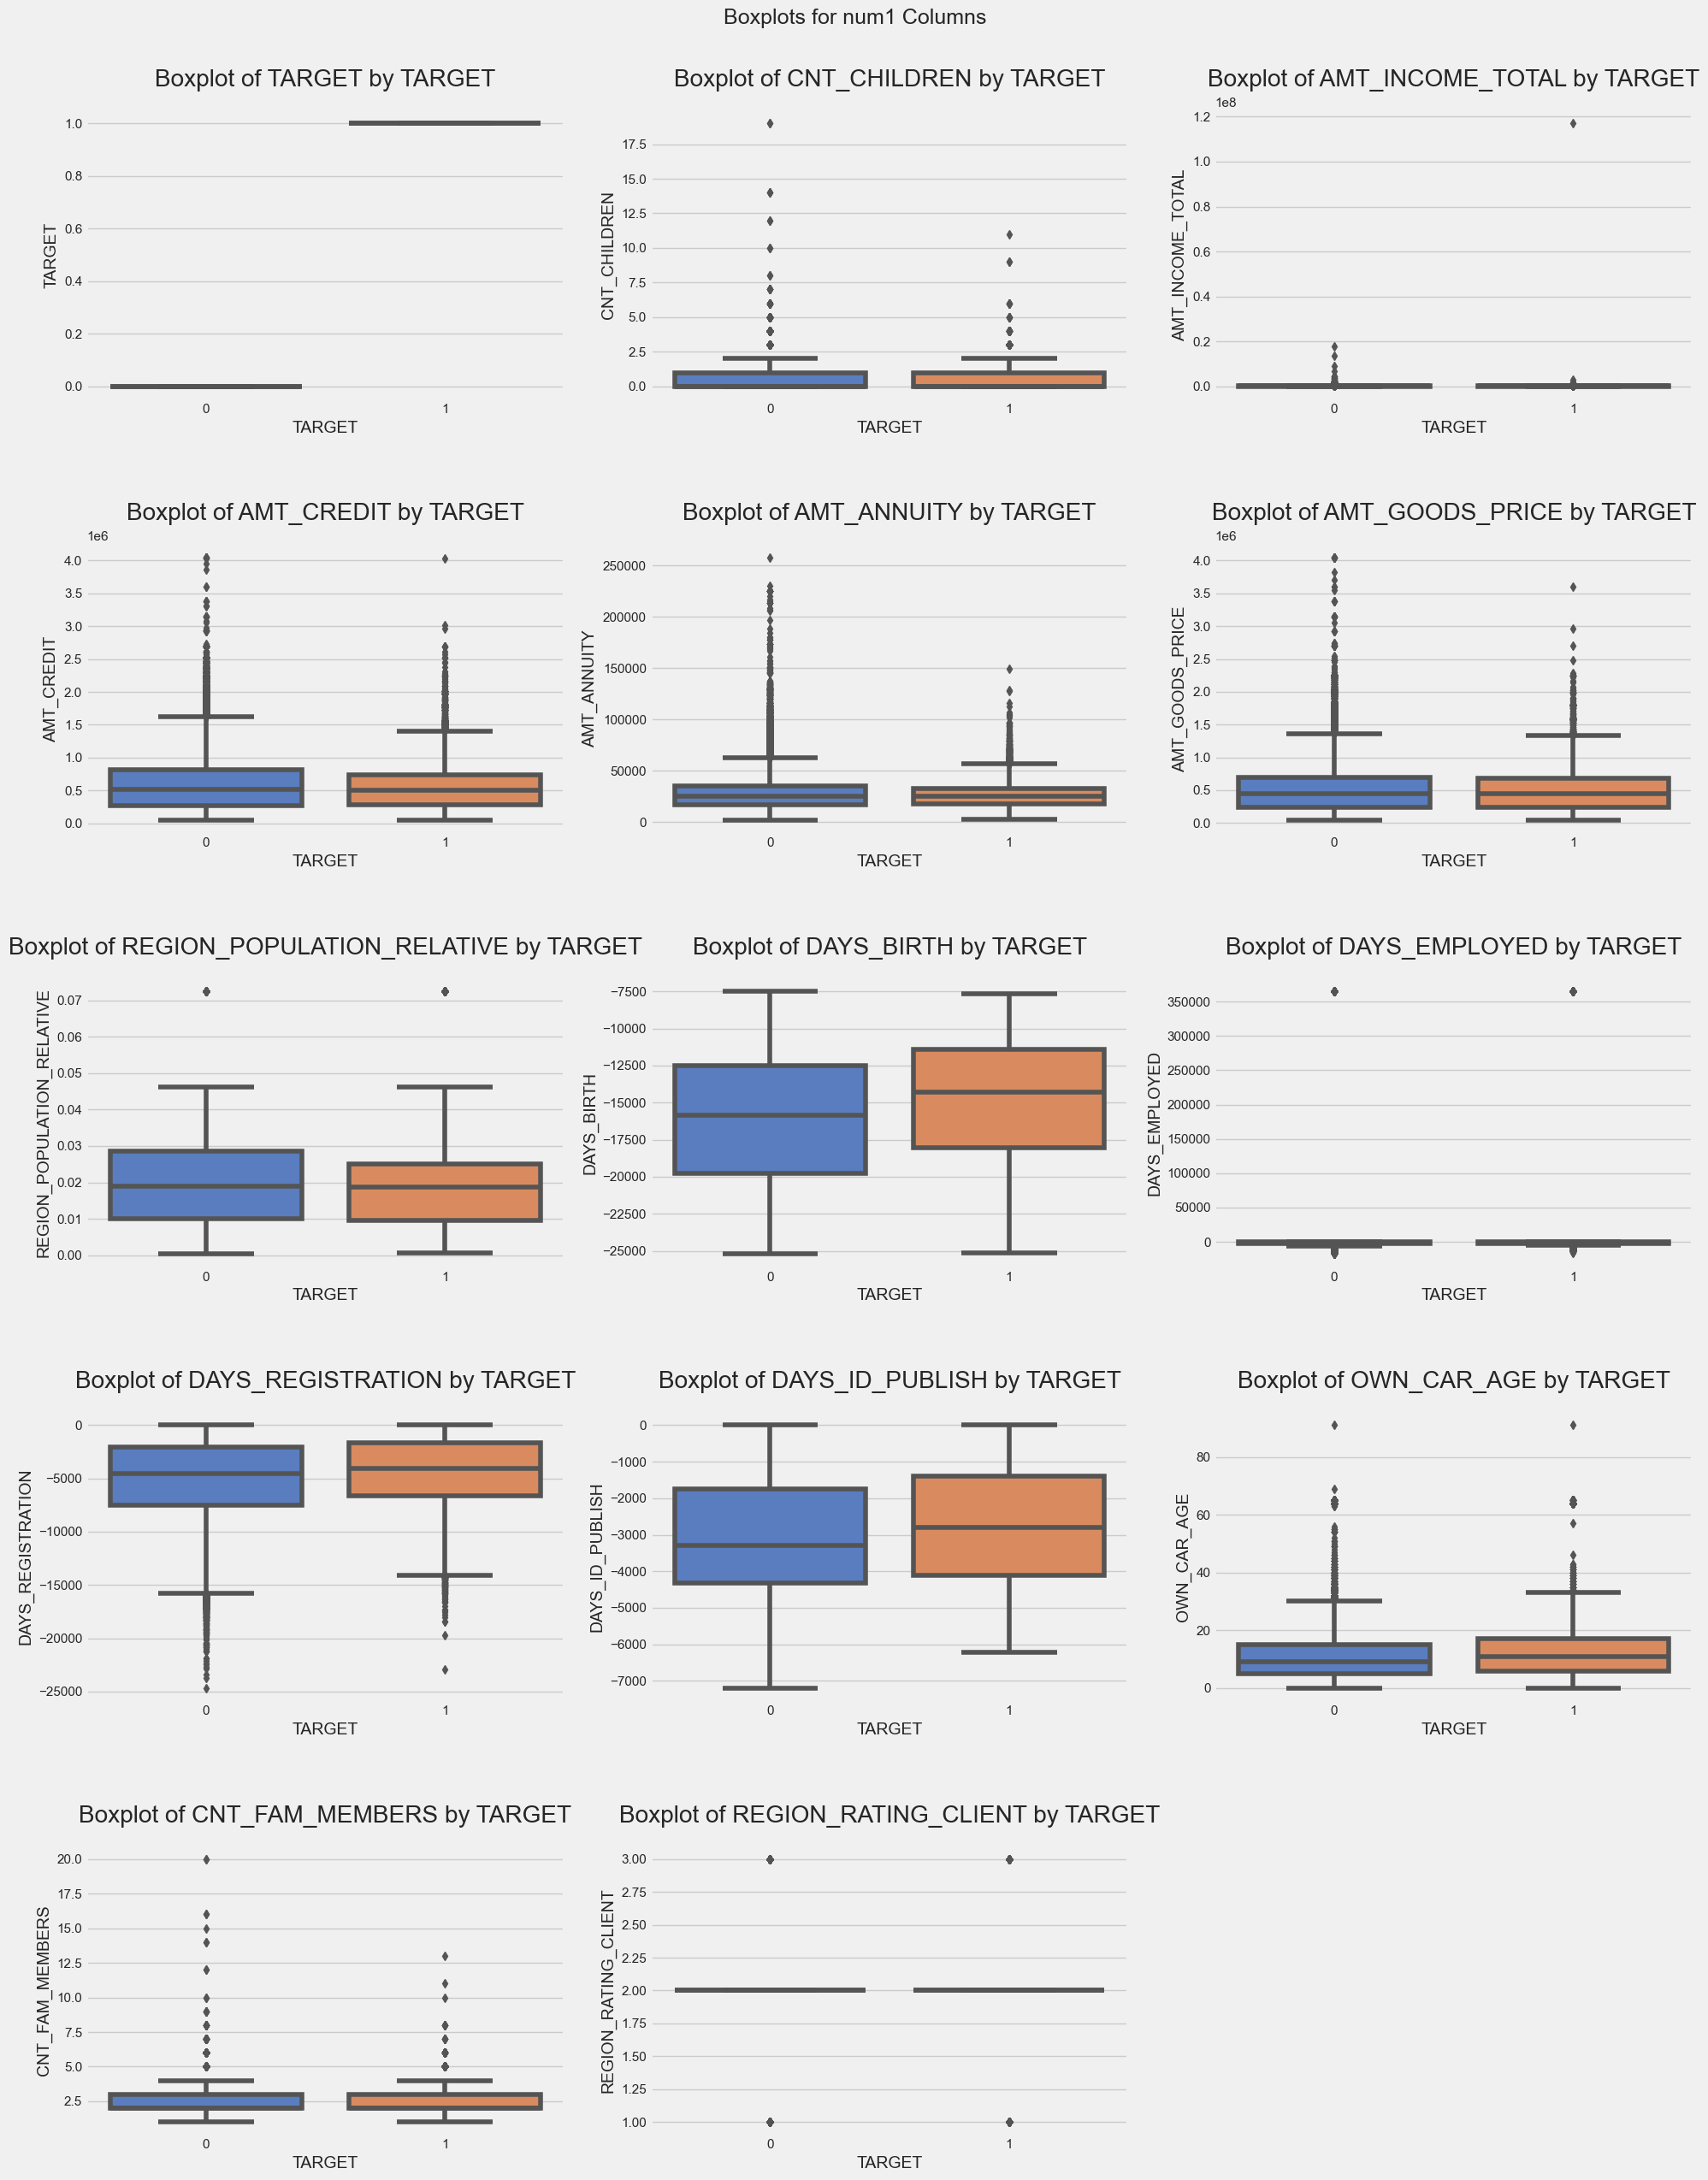

In [ ]:
# Filter kolom-kolom di num1 dan num2 agar hanya mengambil kolom yang ada di data
valid_columns_num1 = [col for col in num1 if col in data.columns]
valid_columns_num2 = [col for col in num2 if col in data.columns]

# Buat boxplot untuk setiap kolom di num1
n_cols = 3
n_rows = int(len(valid_columns_num1) / n_cols) + (len(valid_columns_num1) % n_cols > 0)

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(valid_columns_num1):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Boxplot of {col} by TARGET', pad=20)  # Tambahkan pad untuk memberi jarak
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Boxplots for num1 Columns', fontsize=18, y=1.02)  # Tambahkan y untuk memberi jarak ke bawah
plt.subplots_adjust(hspace=0.5)  # Jarak antar subplot secara vertikal
plt.show()



### Observasi dari Visualisasi `boxplot`:
1. **Kolom `TARGET`**:
   - Distribusi `TARGET` didominasi oleh nilai 0. Ini menunjukkan ketidakseimbangan (imbalance) dalam dataset, di mana sebagian besar nasabah tidak memiliki kejadian gagal bayar (0).
   - **Follow-up**: Ketidakseimbangan data ini perlu diatasi saat modeling, misalnya dengan metode undersampling, oversampling, atau menggunakan teknik *class-weighting* pada algoritma yang dipilih.

2. **Kolom `CNT_CHILDREN`**:
   - Terdapat banyak *outlier* pada jumlah anak, dengan nilai maksimum mencapai 19.
   - **Follow-up**: Periksa distribusi data secara lebih mendalam, pertimbangkan untuk mengubah nilai-nilai `CNT_CHILDREN` yang terlalu besar menjadi nilai yang lebih wajar (misalnya, mengganti dengan nilai median atau mengelompokkan jumlah anak yang >5 sebagai satu kelompok).

3. **Kolom `AMT_INCOME_TOTAL`**:
   - Terdapat *skewness* atau ketidakseimbangan pada distribusi pendapatan, dengan beberapa nilai yang sangat tinggi.
   - **Follow-up**: Gunakan transformasi logaritmik pada kolom ini untuk mengurangi *skewness*, atau hapus nilai ekstrem jika ternyata merupakan kesalahan entri data.

4. **Kolom `AMT_CREDIT` dan `AMT_GOODS_PRICE`**:
   - Distribusi yang tampak merata, namun terdapat beberapa *outlier* dengan nilai yang sangat tinggi.
   - **Follow-up**: Sama seperti `AMT_INCOME_TOTAL`, pertimbangkan transformasi logaritmik atau penanganan *outlier*.

5. **Kolom `DAYS_BIRTH`**:
   - Nilai `DAYS_BIRTH` negatif, yang menunjukkan jumlah hari sejak nasabah lahir. Distribusi relatif normal.
   - **Follow-up**: Tidak ada tindakan khusus yang diperlukan, namun bisa mempertimbangkan untuk mengubah format menjadi usia (positif) agar lebih mudah dipahami.

6. **Kolom `DAYS_EMPLOYED`**:
   - Terdapat anomali pada nilai `DAYS_EMPLOYED`, di mana beberapa nilai menunjukkan jumlah hari bekerja yang sangat tinggi (> 365243). Ini menunjukkan bahwa beberapa entri tidak valid.
   - **Follow-up**: Ganti nilai `DAYS_EMPLOYED` yang tidak realistis dengan `NaN` atau median dari kolom tersebut.

7. **Kolom `OWN_CAR_AGE`**:
   - Terdapat beberapa nilai `OWN_CAR_AGE` yang tinggi (> 90 tahun), yang tidak realistis untuk umur mobil.
   - **Follow-up**: Periksa kembali nilai `OWN_CAR_AGE` yang terlalu tinggi dan ganti dengan `NaN` atau hapus baris yang mengandung nilai tersebut.

8. **Kolom `CNT_FAM_MEMBERS`**:
   - Terdapat beberapa *outlier* dengan jumlah anggota keluarga yang besar (>10).
   - **Follow-up**: Sama seperti `CNT_CHILDREN`, pertimbangkan untuk mengelompokkan jumlah anggota keluarga yang besar sebagai satu kategori.

9. **Kolom `REGION_POPULATION_RELATIVE` dan `REGION_RATING_CLIENT`**:
   - Tidak ada distribusi yang mencurigakan, distribusi cukup normal.
   - **Follow-up**: Tidak ada tindakan khusus yang diperlukan.

### Tindakan Data Pre-Processing:
1. **Tangani Ketidakseimbangan Data (Imbalanced Data)**:
   - Gunakan teknik oversampling (misalnya SMOTE) atau undersampling, atau pertimbangkan penggunaan metode cost-sensitive learning.

2. **Penanganan *Outlier***:
   - Hapus atau ganti nilai *outlier* pada kolom `CNT_CHILDREN`, `AMT_INCOME_TOTAL`, `OWN_CAR_AGE`, dan `DAYS_EMPLOYED`.
   - Gunakan metode seperti `IQR` (Interquartile Range) atau `Z-score` untuk mendeteksi *outlier*.

3. **Transformasi Data**:
   - Terapkan transformasi logaritmik pada kolom `AMT_INCOME_TOTAL`, `AMT_CREDIT`, dan `AMT_GOODS_PRICE` untuk mengurangi *skewness*.

4. **Pengubahan Format**:
   - Ubah format `DAYS_BIRTH` menjadi usia (positif) untuk memudahkan interpretasi.
   - Periksa distribusi dari `DAYS_EMPLOYED` dan pertimbangkan mengubah nilai yang terlalu tinggi menjadi `NaN`.


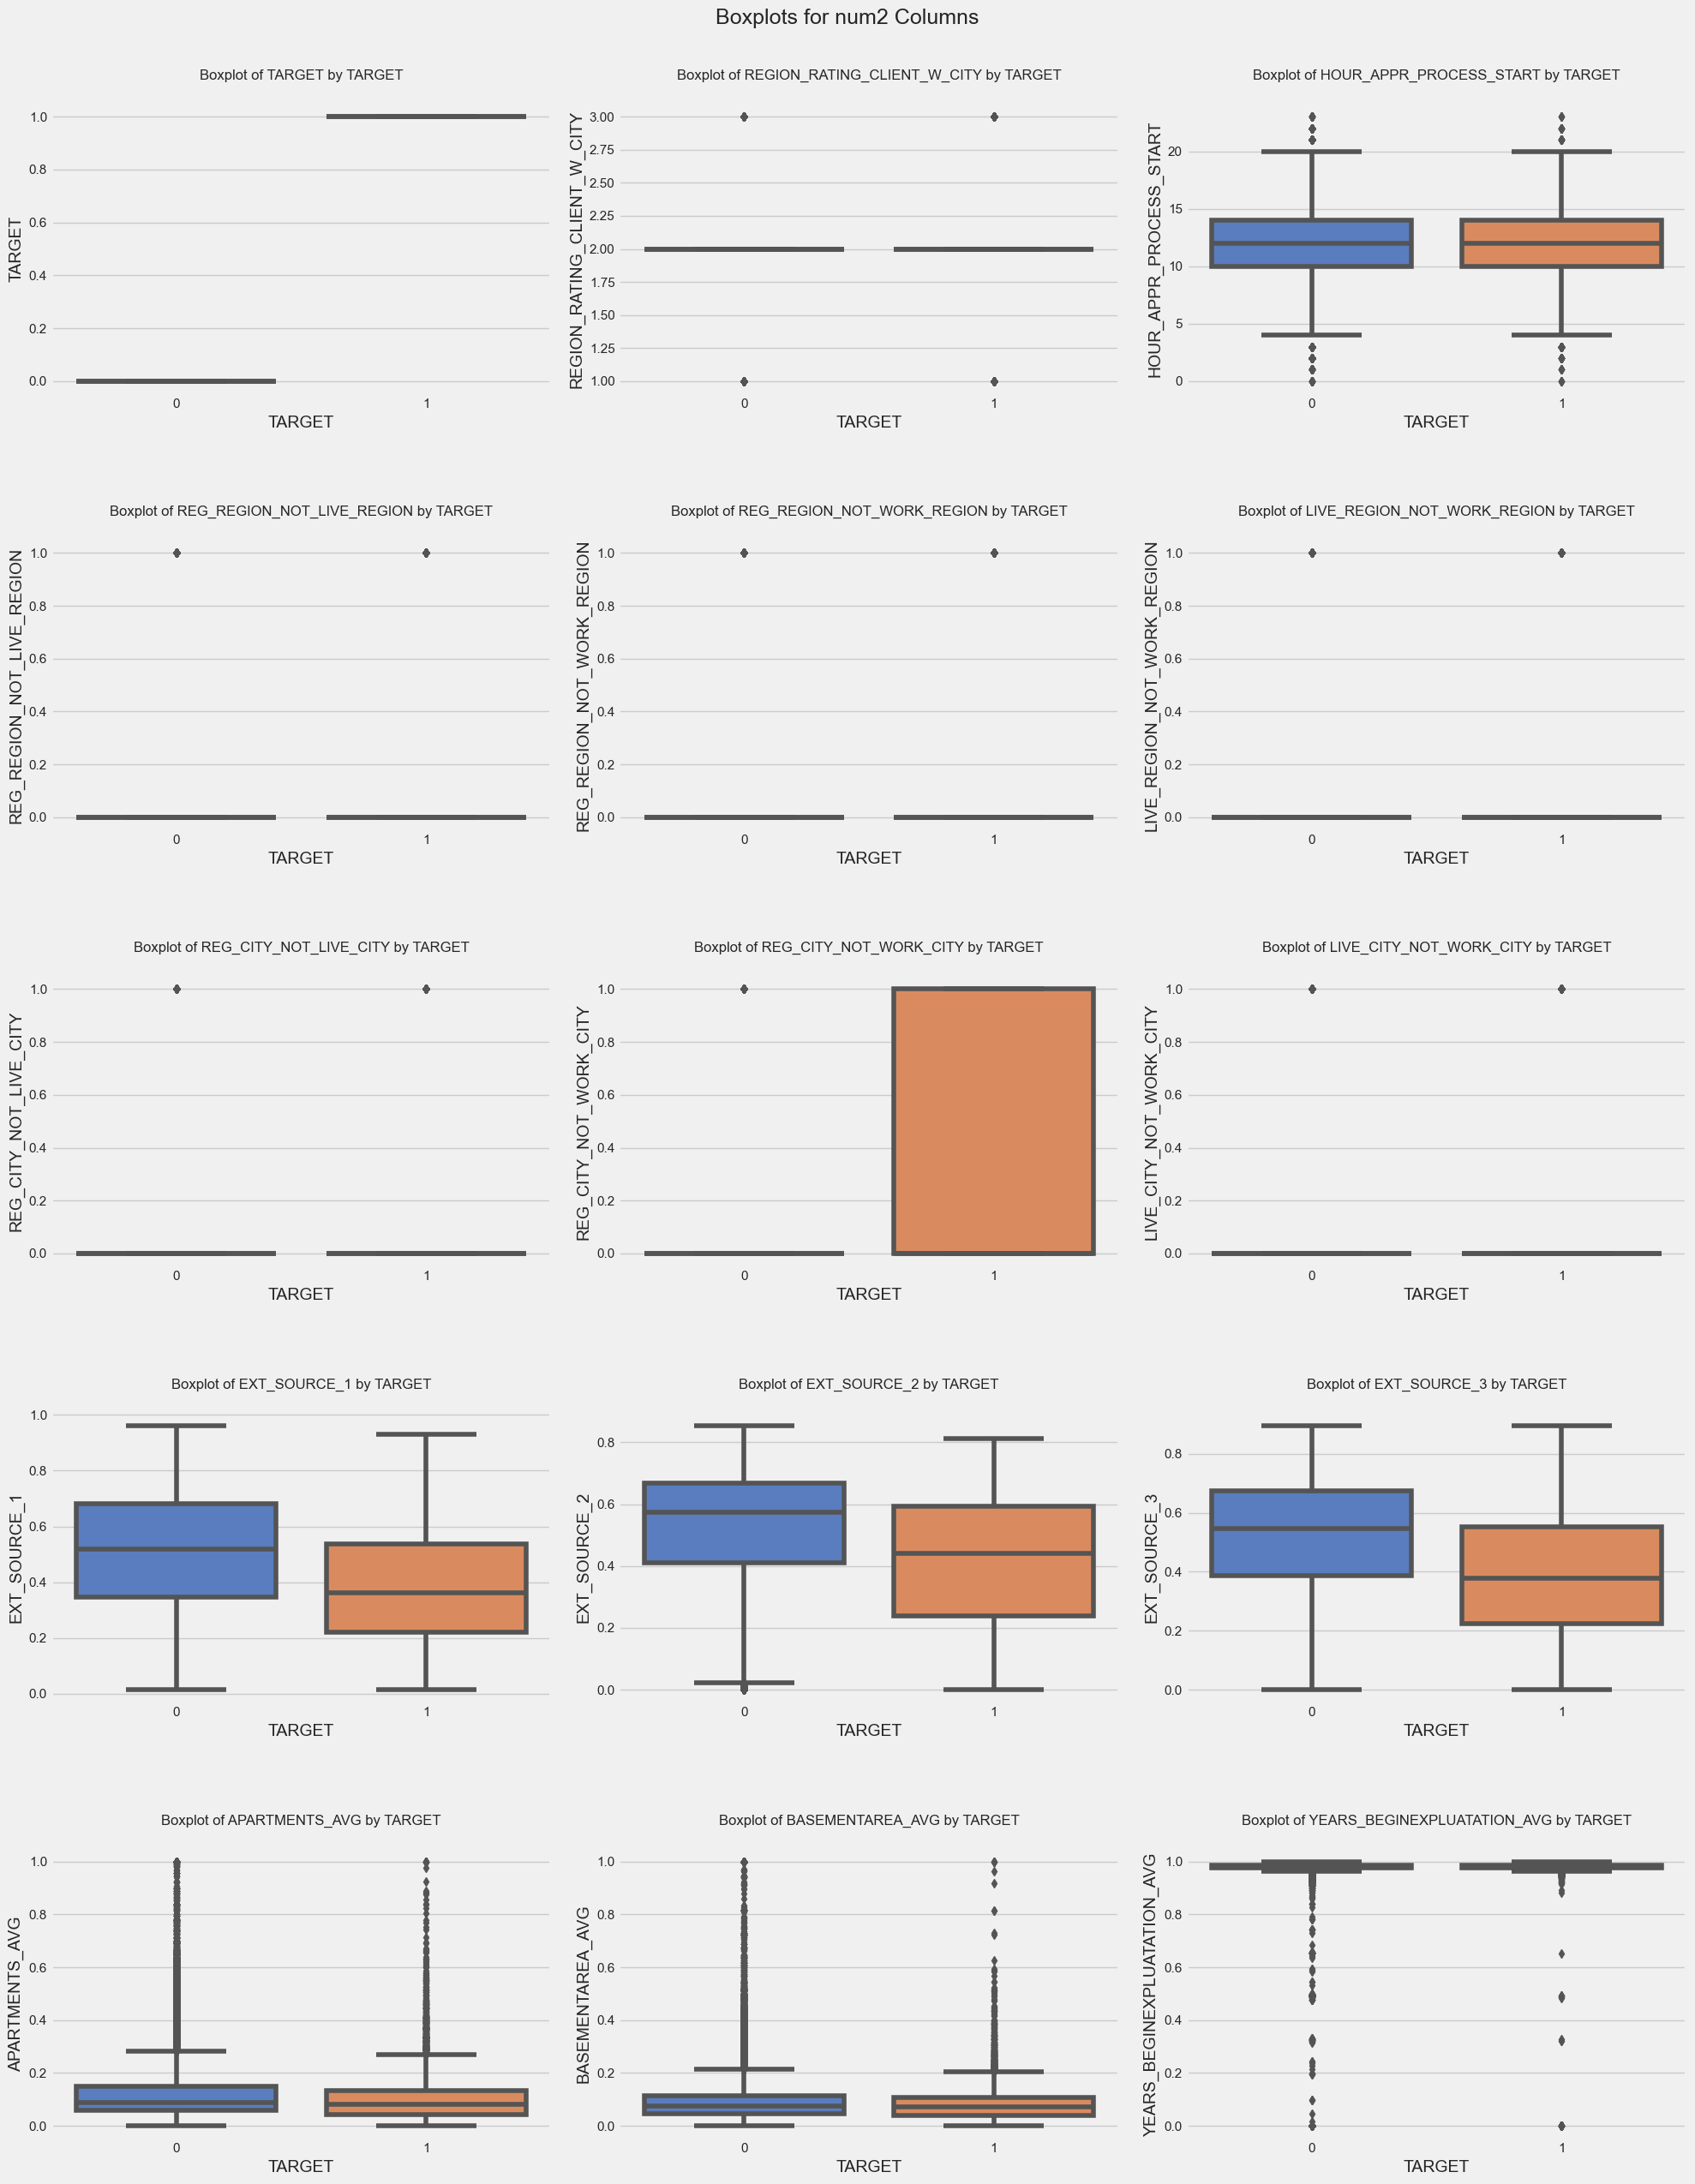

In [ ]:
# Buat boxplot untuk setiap kolom di num2
n_cols = 3
n_rows = int(len(valid_columns_num2) / n_cols) + (len(valid_columns_num2) % n_cols > 0)

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(valid_columns_num2):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Boxplot of {col} by TARGET', fontsize= 12, pad=20)  # Tambahkan pad untuk memberi jarak
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Boxplots for num2 Columns', fontsize=18, y=1.02)  # Tambahkan y untuk memberi jarak ke bawah
plt.subplots_adjust(hspace=0.5)  # Jarak antar subplot secara vertikal
plt.show()

Dari visualisasi *boxplot* pada kolom-kolom di `num2`, berikut adalah beberapa observasi dan analisis terkait distribusi masing-masing kolom dan saran untuk langkah *data pre-processing*:

### Observasi dari Visualisasi `boxplot`:
1. **Kolom `REGION_RATING_CLIENT_W_CITY`**:
   - Distribusi dari kolom ini tampak *skewed* (terpusat di nilai tertentu) dan memiliki rentang nilai yang terbatas (antara 1 hingga 3).
   - Tidak ada *outliers* yang signifikan.
   - **Follow-up**: Distribusi ini normal untuk data rating wilayah, dan tidak memerlukan perubahan khusus pada tahap *pre-processing*.

2. **Kolom `HOUR_APPR_PROCESS_START`**:
   - Distribusi relatif seragam dengan sedikit *outliers*. Nilai *outliers* ini bisa disebabkan oleh aplikasi yang dibuat pada jam-jam tidak umum.
   - **Follow-up**: Periksa *outliers* lebih lanjut, tetapi mungkin dapat diabaikan jika jumlahnya kecil. Anda dapat mengelompokkan jam menjadi beberapa kategori (misalnya pagi, siang, malam) untuk melihat apakah ada pola yang lebih jelas.

3. **Kolom `REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`, `LIVE_REGION_NOT_WORK_REGION`, `REG_CITY_NOT_LIVE_CITY`, `REG_CITY_NOT_WORK_CITY`, `LIVE_CITY_NOT_WORK_CITY`**:
   - Kolom-kolom ini memiliki banyak nilai nol (mayoritas), yang menunjukkan bahwa sebagian besar nasabah tinggal dan bekerja di wilayah yang sama. Distribusi yang mendominasi dengan nilai nol ini menunjukkan bahwa data sangat tidak seimbang.
   - **Follow-up**: Pertimbangkan untuk mengubah kolom-kolom ini menjadi biner (1 jika nilainya tidak 0, 0 jika nilainya 0) untuk mengurangi ketidakseimbangan dan memudahkan interpretasi.

4. **Kolom `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`**:
   - Ketiga kolom ini memiliki distribusi yang agak serupa, dan terlihat tidak terlalu ada perbedaan signifikan antara nasabah dengan `TARGET` 0 dan 1.
   - Terdapat beberapa *outliers* di kolom `EXT_SOURCE_3`.
   - **Follow-up**: Karena kolom-kolom ini memiliki informasi penting (berdasarkan analisis korelasi yang biasanya dilakukan), jangan hapus kolom ini. Sebaiknya lakukan *normalization* atau *scaling* jika diperlukan untuk memudahkan model dalam memahami datanya.

5. **Kolom `APARTMENTS_AVG`, `BASEMENTAREA_AVG`, `YEARS_BEGINEXPLUATATION_AVG`**:
   - Kolom-kolom ini memiliki distribusi yang sangat *skewed* dengan banyak nilai nol. Nilai ini menunjukkan bahwa sebagian besar nasabah mungkin tidak memiliki apartemen atau basement, atau bangunan yang mereka tinggali berumur sangat muda.
   - Banyak *outliers* yang muncul pada ketiga kolom ini.
   - **Follow-up**: Pertimbangkan untuk menangani *outliers* dengan mengelompokkan nilai, misalnya:
     - `YEARS_BEGINEXPLUATATION_AVG` dapat dikelompokkan ke dalam kategori usia bangunan (baru, sedang, lama).
     - Nilai `APARTMENTS_AVG` dan `BASEMENTAREA_AVG` yang nol dapat diubah menjadi satu kategori, dan sisanya dibiarkan sebagai nilai aslinya.

6. **Kolom `REGION_POPULATION_RELATIVE`**:
   - Kolom ini memiliki nilai yang mendominasi di rentang tertentu.
   - **Follow-up**: Tidak ada tindakan khusus yang diperlukan kecuali normalisasi atau transformasi data jika distribusinya sangat tidak normal.

### Tindakan Data Pre-Processing:
1. **Transformasi Data**:
   - Untuk kolom `HOUR_APPR_PROCESS_START`, ubah nilai ke dalam kategori (misal pagi, siang, malam) untuk melihat hubungan yang lebih jelas dengan `TARGET`.
   - Gunakan transformasi logaritmik pada kolom yang sangat *skewed*, seperti `APARTMENTS_AVG`, `BASEMENTAREA_AVG`.

2. **Penanganan Ketidakseimbangan Data**:
   - Untuk kolom `REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`, dan `LIVE_REGION_NOT_WORK_REGION`, pertimbangkan untuk membuat kategori biner (0 atau 1) agar lebih mudah diinterpretasikan.

3. **Penanganan Outliers**:
   - Gunakan metode `IQR` (Interquartile Range) atau `Z-score` untuk mendeteksi dan mengatasi *outliers* pada kolom `EXT_SOURCE_3`, `APARTMENTS_AVG`, `BASEMENTAREA_AVG`.

4. **Scaling dan Normalization**:
   - Gunakan *scaling* atau *normalization* pada kolom `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3` untuk membantu algoritma model memahami skala yang sama.


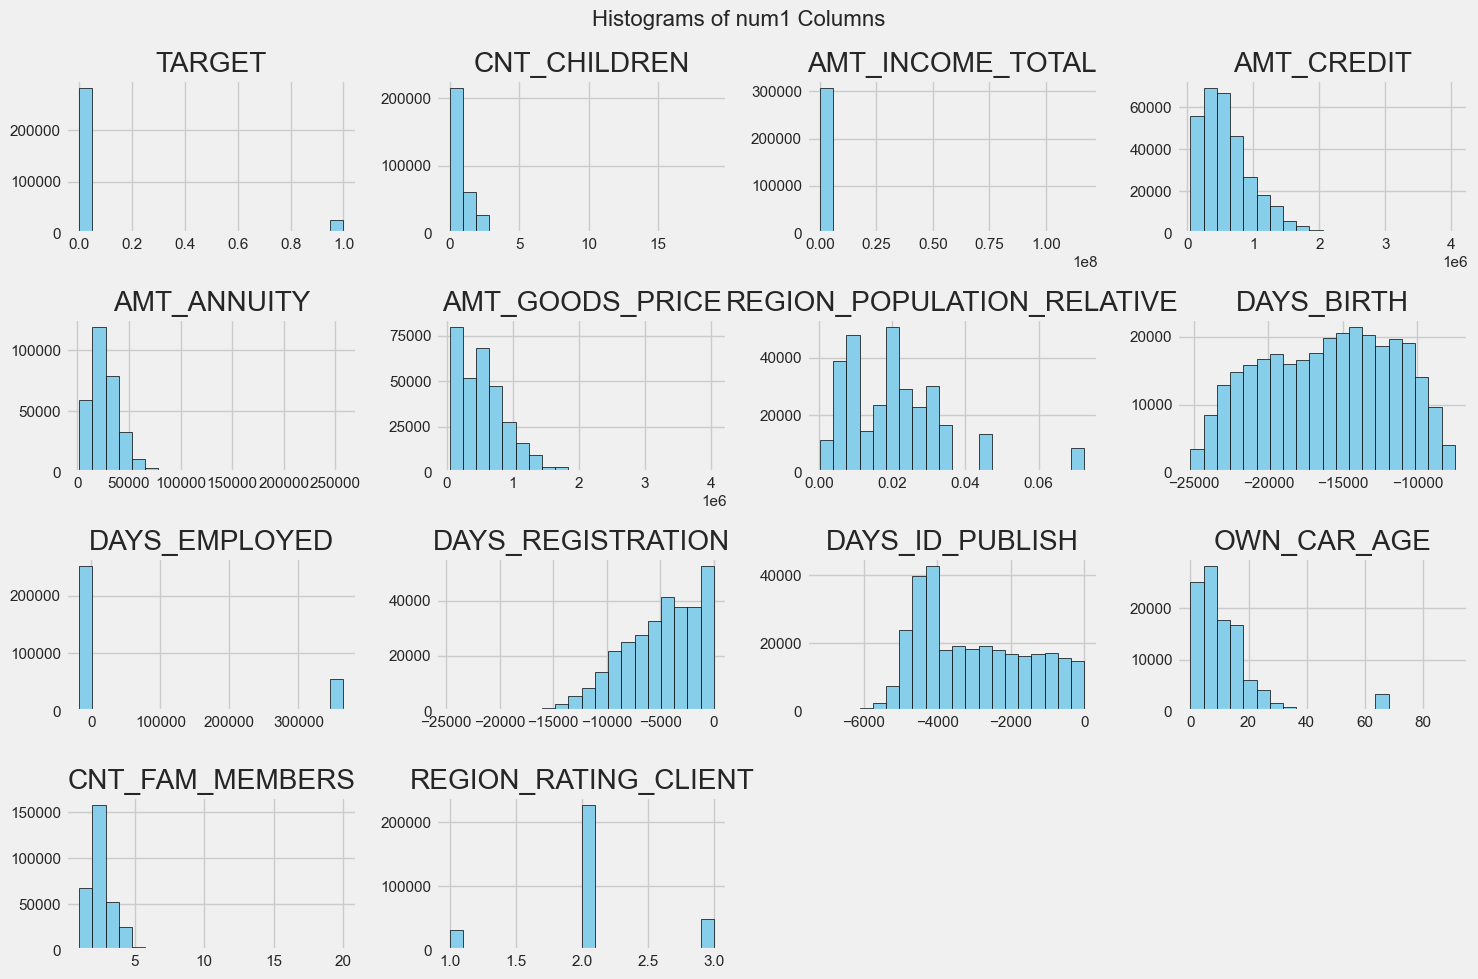

In [ ]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns = [col for col in num1 if col in data.columns]

# Membuat histogram untuk setiap kolom yang valid
data[valid_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of num1 Columns', fontsize=16)
plt.tight_layout()
plt.show()

### Observasi dari Visualisasi Histogram `num1:
1. **Kolom `CNT_CHILDREN`**:
   - Distribusi kolom ini menunjukkan bahwa sebagian besar nasabah memiliki 0 atau 1 anak, dan hanya sedikit yang memiliki lebih dari 2 anak.
   - Terdapat beberapa nilai ekstrim (outlier) dengan jumlah anak hingga 15, yang mungkin tidak realistis.
   - **Follow-up**: Lakukan pemotongan nilai (capping) pada `CNT_CHILDREN` atau kelompokkan menjadi beberapa kategori seperti:
     - `0` anak.
     - `1-2` anak.
     - `>2` anak.

2. **Kolom `AMT_INCOME_TOTAL`**:
   - Distribusi sangat *skewed* (terpusat di nilai kecil) dengan nilai pendapatan yang mencapai `10^8`.
   - Terdapat outlier yang signifikan, yang bisa disebabkan oleh entri data yang salah atau outlier yang ekstrem.
   - **Follow-up**: Gunakan transformasi logaritmik atau normalisasi untuk mengurangi *skewness*. Pertimbangkan untuk melakukan *clipping* pada nilai pendapatan ekstrem jika tidak realistis.

3. **Kolom `AMT_CREDIT`**:
   - Distribusi mirip dengan `AMT_INCOME_TOTAL`, dengan banyak nilai terpusat pada rentang rendah dan beberapa outlier besar.
   - **Follow-up**: Gunakan transformasi logaritmik untuk mengurangi *skewness* atau lakukan pemotongan nilai pada outlier.

4. **Kolom `AMT_ANNUITY`**:
   - Distribusi terlihat cukup merata, namun terdapat beberapa nilai ekstrem di ujung kanan.
   - **Follow-up**: Lakukan pemotongan nilai pada *outliers* atau gunakan metode seperti `IQR` untuk mendeteksi dan mengatasi *outliers* tersebut.

5. **Kolom `AMT_GOODS_PRICE`**:
   - Sebagian besar nilai terkonsentrasi di nilai yang lebih rendah, menunjukkan ketidakseimbangan distribusi.
   - **Follow-up**: Sama seperti `AMT_INCOME_TOTAL` dan `AMT_CREDIT`, pertimbangkan transformasi logaritmik untuk distribusi yang lebih baik.

6. **Kolom `REGION_POPULATION_RELATIVE`**:
   - Kolom ini memiliki distribusi yang relatif normal, meskipun ada beberapa nilai ekstrem di ujung kanan.
   - **Follow-up**: Periksa apakah nilai-nilai ekstrem ini realistis. Jika tidak, lakukan pemotongan nilai (capping) atau transformasi data.

7. **Kolom `DAYS_BIRTH`**:
   - Distribusi ini tampak normal, dengan nilai-nilai negatif yang menunjukkan jumlah hari sejak nasabah lahir.
   - **Follow-up**: Ubah nilai `DAYS_BIRTH` menjadi usia dalam tahun agar lebih mudah dipahami.

8. **Kolom `DAYS_EMPLOYED`**:
   - Terdapat anomali pada distribusi ini, di mana beberapa nilai mencapai lebih dari 300,000 hari (setara 1000 tahun). Ini menunjukkan adanya entri yang tidak valid.
   - **Follow-up**: Ganti nilai-nilai ekstrem tersebut dengan `NaN` atau nilai median dari kolom ini. Anda juga dapat membuat kategori untuk membedakan nasabah dengan durasi kerja yang sangat lama.

9. **Kolom `DAYS_REGISTRATION`**:
   - Distribusi menunjukkan bahwa sebagian besar nasabah baru mendaftarkan diri dalam beberapa tahun terakhir.
   - **Follow-up**: Sama seperti `DAYS_BIRTH`, ubah format nilai menjadi positif agar lebih mudah dipahami.

10. **Kolom `DAYS_ID_PUBLISH`**:
    - Distribusi ini memiliki pola normal tanpa anomali yang jelas.
    - **Follow-up**: Tidak ada tindakan khusus yang diperlukan kecuali pengubahan format nilai jika diperlukan.

11. **Kolom `OWN_CAR_AGE`**:
    - Distribusi menunjukkan bahwa sebagian besar nasabah memiliki mobil yang umurnya relatif rendah, namun ada beberapa nilai ekstrem (lebih dari 60 tahun).
    - **Follow-up**: Lakukan pemotongan nilai pada *outliers* atau ganti nilai ekstrim dengan `NaN` jika data tersebut tidak realistis.

12. **Kolom `CNT_FAM_MEMBERS`**:
    - Sebagian besar nasabah memiliki 1 hingga 3 anggota keluarga. Terdapat nilai ekstrem hingga 20 anggota keluarga.
    - **Follow-up**: Lakukan pemotongan nilai (capping) atau kelompokkan jumlah anggota keluarga menjadi beberapa kategori untuk mengurangi pengaruh *outliers*.

13. **Kolom `REGION_RATING_CLIENT`**:
    - Distribusi memiliki beberapa nilai kategori (1, 2, dan 3), menunjukkan rating wilayah nasabah.
    - **Follow-up**: Tidak ada tindakan khusus yang diperlukan pada kolom ini.

### Tindakan Data Pre-Processing:
1. **Transformasi Logaritmik**:
   - Terapkan transformasi logaritmik pada kolom `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, dan `AMT_GOODS_PRICE` untuk mengurangi *skewness*.

2. **Penanganan Outliers**:
   - Gunakan metode `IQR` (Interquartile Range) atau `Z-score` untuk mendeteksi dan mengatasi *outliers* pada kolom `CNT_CHILDREN`, `AMT_ANNUITY`, `OWN_CAR_AGE`, dan `CNT_FAM_MEMBERS`.

3. **Pengubahan Format**:
   - Ubah nilai `DAYS_BIRTH`, `DAYS_EMPLOYED`, dan `DAYS_REGISTRATION` menjadi format usia (positif) agar lebih mudah diinterpretasi.

4. **Pembuatan Kategori**:
   - Buat kategori untuk kolom `CNT_CHILDREN` dan `CNT_FAM_MEMBERS` berdasarkan rentang nilai untuk memudahkan pemahaman distribusi.


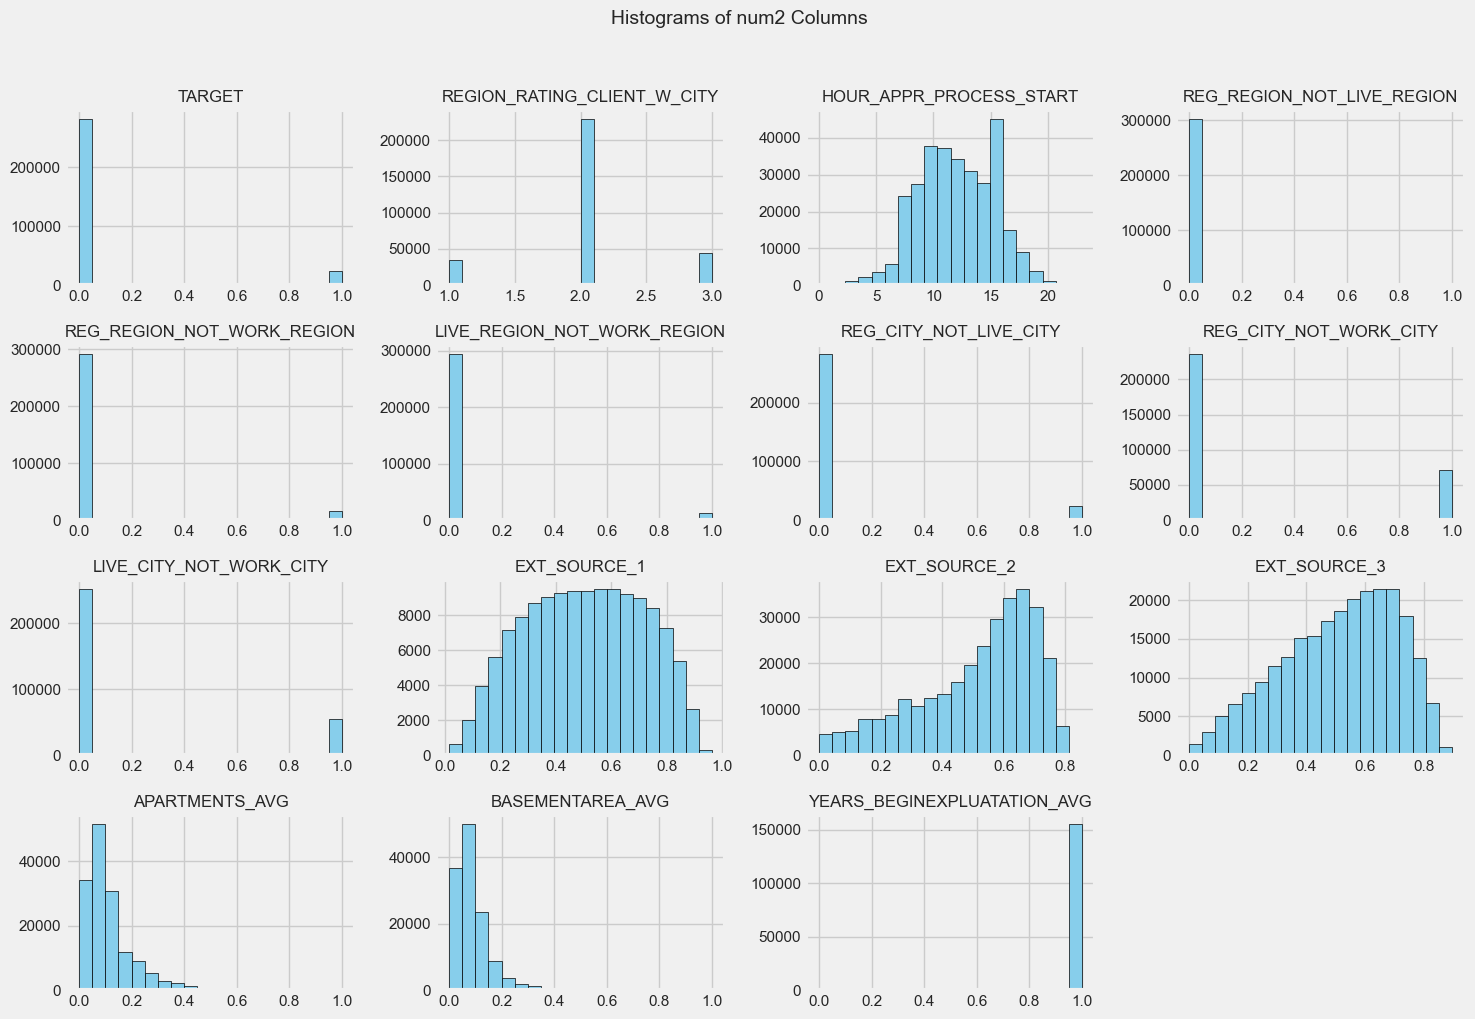

In [ ]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns2 = [col for col in num2 if col in data.columns]

# Membuat histogram untuk setiap kolom yang valid
axes = data[valid_columns2].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')

# Mengatur ukuran font untuk setiap subplot title
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=12)  # Ukuran font title lebih kecil untuk setiap subplot

# Mengatur ukuran font untuk suptitle
plt.suptitle('Histograms of num2 Columns', fontsize=14, y=1.02)  # Ukuran font lebih kecil, dan jarak sedikit ke atas

# Tampilkan plot dengan pengaturan tata letak yang rapih
plt.tight_layout()
plt.show()


Berdasarkan histogram pada kolom-kolom di `num2`, berikut adalah observasi distribusi masing-masing kolom beserta saran untuk langkah *data pre-processing*:

### Observasi dari Visualisasi Histogram `num2`:

1. **Kolom `REGION_RATING_CLIENT_W_CITY`**:
   - Nilai distribusi terpusat di angka 2, menunjukkan sebagian besar nasabah berada pada kategori tersebut. Kolom ini terlihat tidak merata dan cenderung skewed.
   - **Follow-up**: Pertimbangkan untuk mengubah nilai ini menjadi kategori (misalnya, rendah, sedang, tinggi) dan lihat apakah ada pola yang lebih jelas saat dilakukan *feature engineering*.

2. **Kolom `HOUR_APPR_PROCESS_START`**:
   - Distribusi terlihat mendekati normal dengan sedikit skewed ke kanan. Terdapat nilai outlier di bagian atas dan bawah, tetapi jumlahnya tidak signifikan.
   - **Follow-up**: Buat kategori berdasarkan jam (misal pagi, siang, sore, malam) agar lebih mudah dimengerti dan untuk melihat hubungan dengan `TARGET`.

3. **Kolom `REG_REGION_NOT_LIVE_REGION`, `LIVE_REGION_NOT_WORK_REGION`, `REG_CITY_NOT_LIVE_CITY`, `REG_CITY_NOT_WORK_CITY`, `LIVE_CITY_NOT_WORK_CITY`**:
   - Sebagian besar nilai berada di angka `0`, yang berarti sebagian besar nasabah tinggal, bekerja, dan hidup di wilayah atau kota yang sama. Hanya sedikit yang memiliki nilai 1.
   - **Follow-up**: Karena distribusi data tidak merata, pertimbangkan untuk melakukan encoding biner atau ubah kolom ini menjadi `0` atau `1` saja untuk memudahkan interpretasi.

4. **Kolom `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`**:
   - Ketiga kolom ini memiliki distribusi yang serupa. `EXT_SOURCE_1` memiliki distribusi yang lebih merata, sedangkan `EXT_SOURCE_2` dan `EXT_SOURCE_3` sedikit skewed ke kanan.
   - **Follow-up**: Jangan lakukan penghapusan data karena ini adalah informasi penting yang biasanya menunjukkan skor eksternal nasabah. Gunakan scaling atau normalisasi untuk memastikan skala data ini serupa dengan kolom numerik lainnya.

5. **Kolom `APARTMENTS_AVG`, `BASEMENTAREA_AVG`, `YEARS_BEGINEXPLUATATION_AVG`**:
   - Nilai `APARTMENTS_AVG` dan `BASEMENTAREA_AVG` menunjukkan skewness yang kuat ke arah kanan. Banyak nilai berada pada angka 0, menandakan bahwa banyak nasabah yang tidak memiliki apartemen atau basement.
   - `YEARS_BEGINEXPLUATATION_AVG` menunjukkan distribusi yang lebih seragam, meskipun ada sedikit skewness.
   - **Follow-up**: Pertimbangkan untuk melakukan transformasi logaritmik atau capping pada nilai-nilai ekstrem. Lakukan juga analisis lebih lanjut apakah nilai-nilai ekstrem ini merupakan *outliers* atau data yang valid.

6. **Kolom `REG_REGION_NOT_WORK_REGION` dan `REG_REGION_NOT_LIVE_REGION`**:
   - Hampir seluruh data memiliki nilai 0, menunjukkan mayoritas nasabah tinggal dan bekerja di wilayah yang sama.
   - **Follow-up**: Pertimbangkan untuk menyederhanakan kolom ini menjadi biner `0` atau `1` saja untuk mengatasi ketidakseimbangan distribusi yang ekstrem.

### Tindakan Data Pre-Processing yang Direkomendasikan:

1. **Pembuatan Kategori**:
   - Buat kategori untuk kolom `HOUR_APPR_PROCESS_START` (misalnya, pagi, siang, malam) agar lebih mudah diinterpretasi.
   - Buat kategori untuk `REGION_RATING_CLIENT_W_CITY` sebagai rendah, sedang, dan tinggi.

2. **Penanganan Ketidakseimbangan Data**:
   - Kolom `REG_REGION_NOT_LIVE_REGION`, `LIVE_REGION_NOT_WORK_REGION`, dan `REG_CITY_NOT_LIVE_CITY` memiliki distribusi yang sangat tidak seimbang. Lakukan binerisasi kolom atau ubah menjadi nilai `0` atau `1`.

3. **Normalisasi dan Scaling**:
   - Terapkan normalisasi pada kolom `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3` agar skala data lebih konsisten dengan kolom numerik lainnya.

4. **Transformasi Logaritmik**:
   - Pertimbangkan transformasi logaritmik pada kolom yang sangat *skewed* seperti `APARTMENTS_AVG` dan `BASEMENTAREA_AVG` untuk mengurangi skewness.

5. **Penanganan *Outliers***:
   - Gunakan metode `IQR` atau `Z-score` untuk mendeteksi dan mengatasi *outliers* pada `APARTMENTS_AVG`, `BASEMENTAREA_AVG`, dan `YEARS_BEGINEXPLUATATION_AVG`.


## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




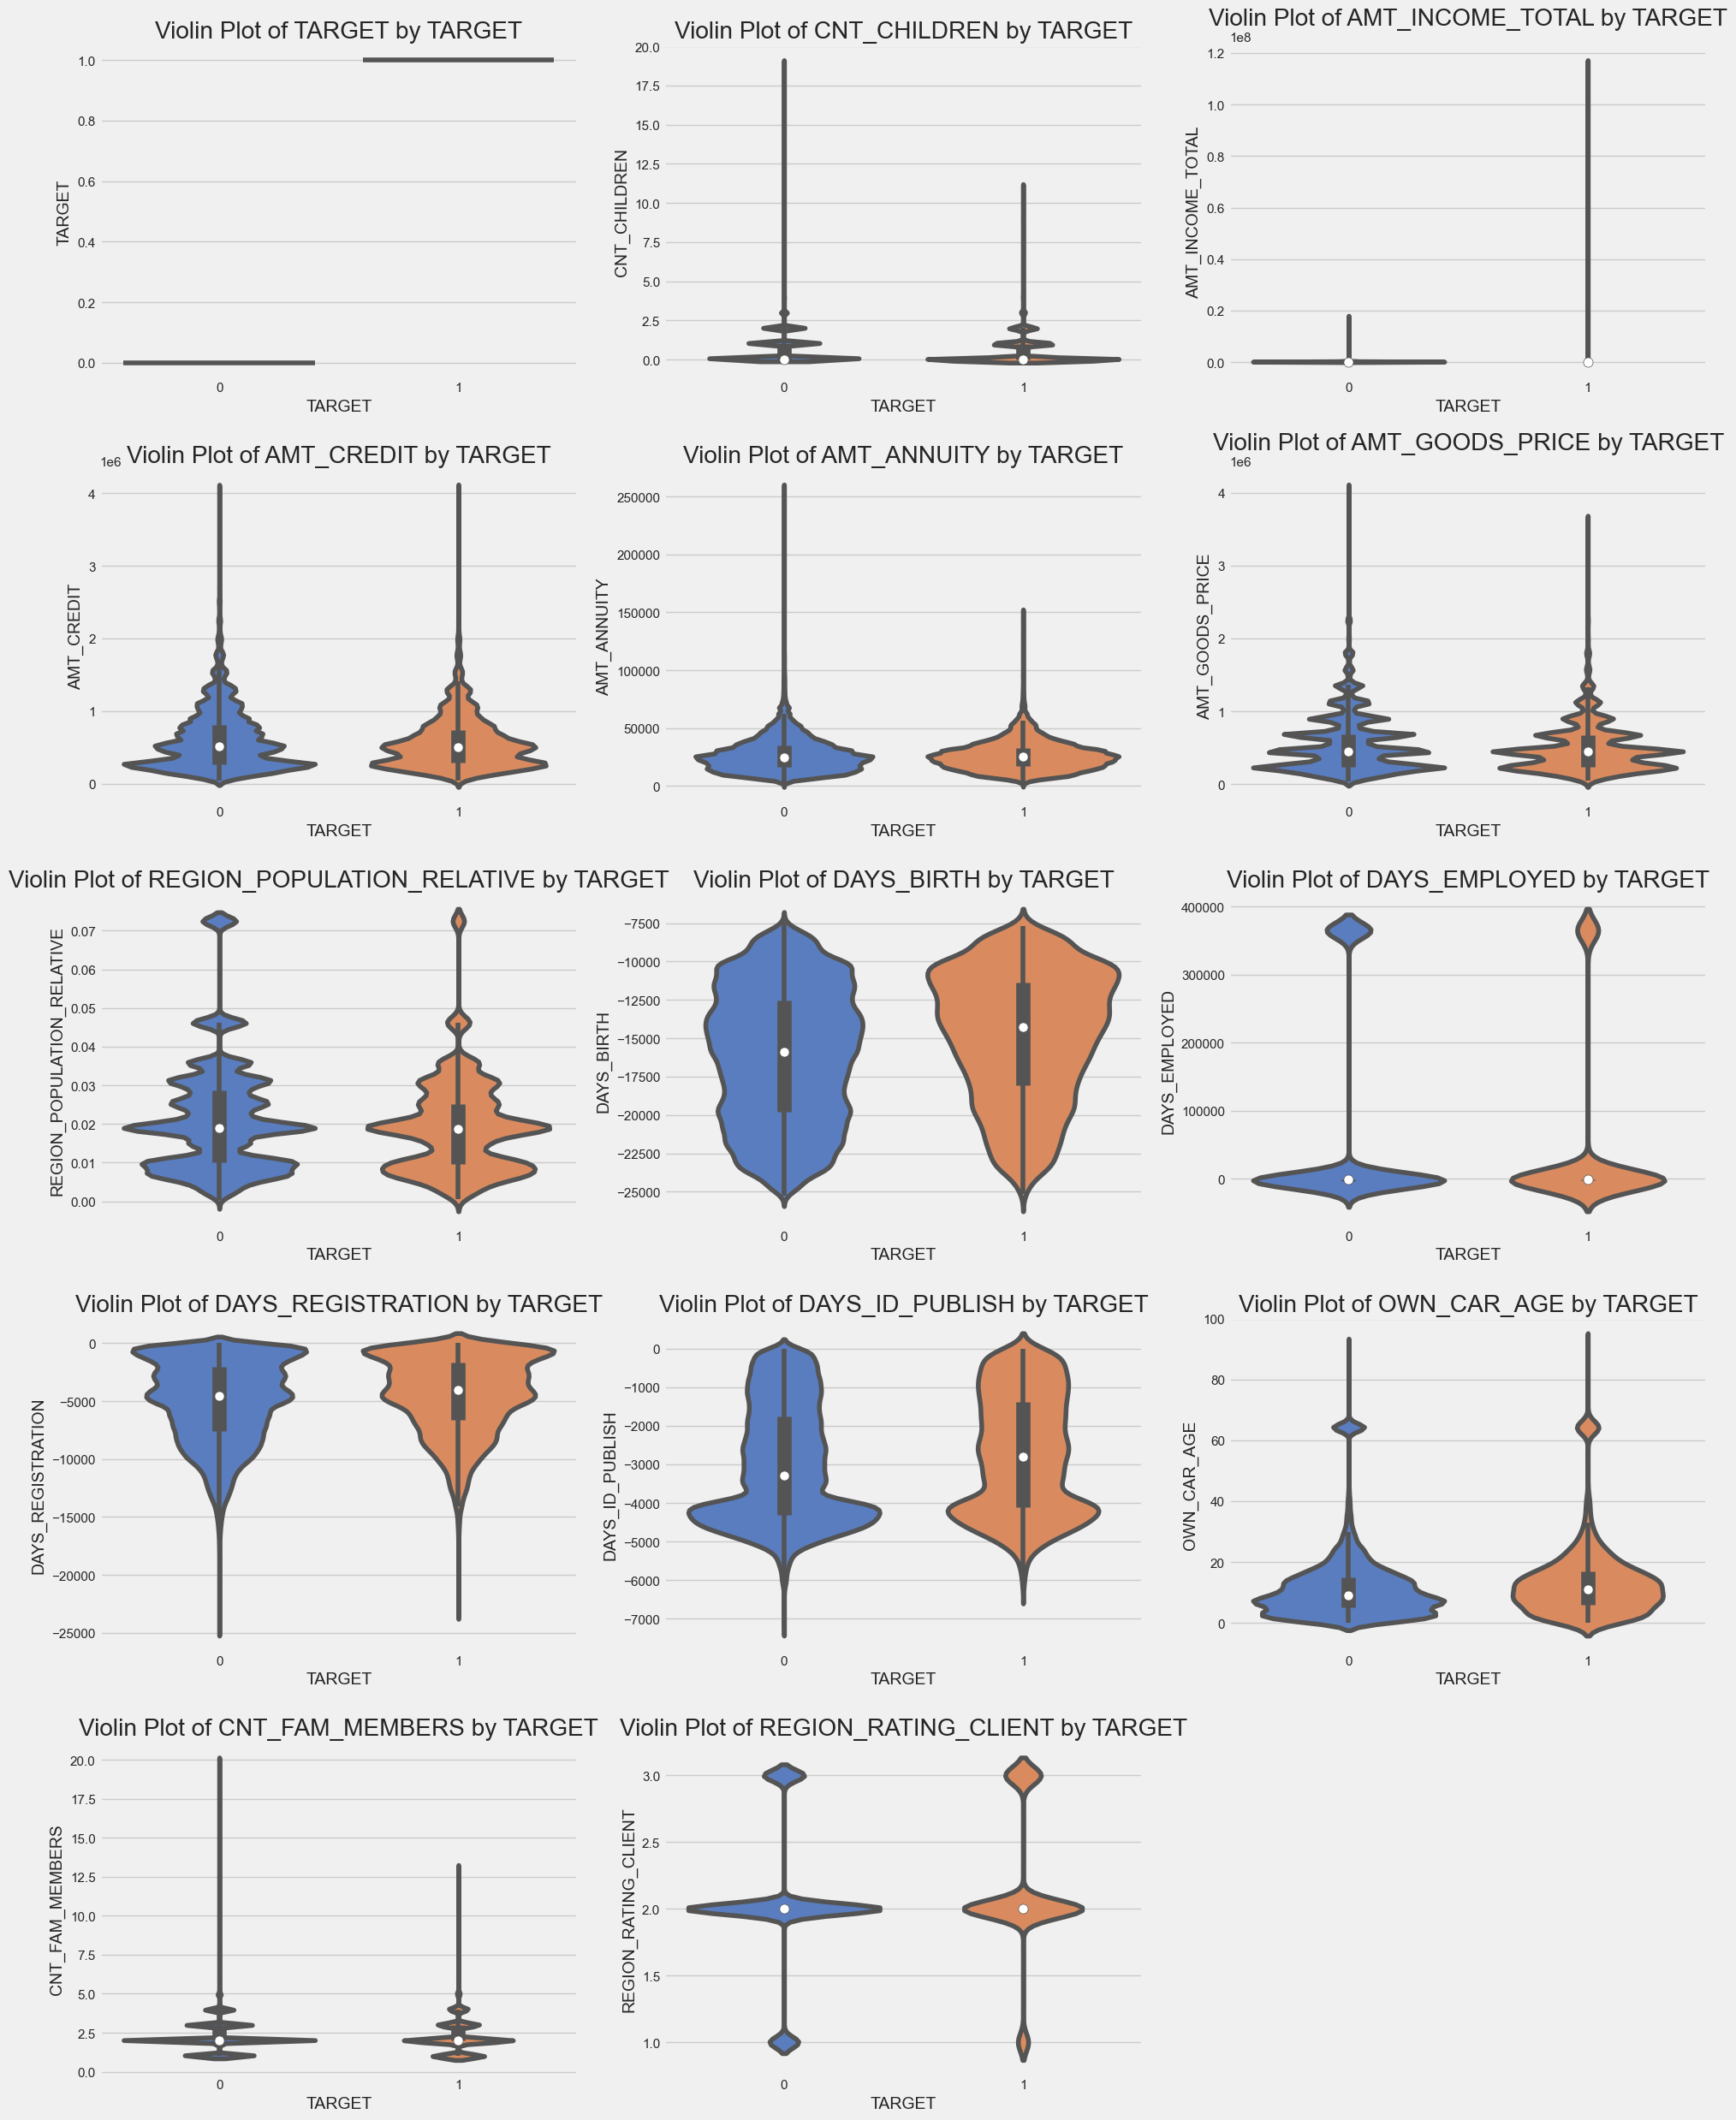

In [ ]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns = [col for col in num1 if col in data.columns]

# Buat figure besar untuk menampung semua violin plot
n_cols = 3  # Jumlah kolom dalam grid
n_rows = int(len(valid_columns) / n_cols) + (len(valid_columns) % n_cols > 0)  # Hitung jumlah baris dalam grid

plt.figure(figsize=(20, 5 * n_rows))

# Plot violin plot untuk setiap kolom yang valid
for i, col in enumerate(valid_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Violin Plot of {col} by TARGET')
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

# Tampilkan plot
plt.show()

Berikut adalah observasi distribusi dari masing-masing kolom (feature) berdasarkan visualisasi *violin plot* yang ditampilkan:

### Observasi dari Visualisasi Violin Plot `num2`:

Dari visualisasi violin plot di atas, berikut adalah beberapa observasi dan rekomendasi untuk data pre-processing:

1. **Distribusi `REGION_RATING_CLIENT` dan `REGION_RATING_CLIENT_W_CITY`**:
   - Distribusi dari kedua kolom ini memiliki karakteristik yang mirip antara target 0 dan 1.
   - Kedua kolom memiliki distribusi yang terpusat pada nilai tertentu, menunjukkan bahwa sebagian besar nilai didominasi oleh beberapa kategori saja. Hal ini menunjukkan bahwa sebagian besar nasabah berasal dari daerah dengan rating tertentu.
   - **Rekomendasi**: Lakukan encoding untuk data ini jika ingin digunakan sebagai feature, atau lakukan penggabungan jika jumlah kategori terlalu sedikit.

2. **Distribusi `HOUR_APPR_PROCESS_START`**:
   - Distribusi dari `HOUR_APPR_PROCESS_START` menunjukkan perbedaan antara target 0 dan 1, terutama di jam-jam tertentu.
   - Nasabah dengan target 1 (default) cenderung memiliki proses aplikasi pada jam-jam yang lebih tinggi dibandingkan nasabah dengan target 0.
   - **Rekomendasi**: Lakukan analisis lebih lanjut untuk menentukan apakah jam aplikasi memiliki pengaruh yang signifikan terhadap prediksi default. Jika iya, lakukan feature engineering seperti pengelompokan jam menjadi kategori (misal: pagi, siang, malam).

3. **Distribusi `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3`**:
   - Ketiga kolom ini menunjukkan perbedaan distribusi yang jelas antara target 0 dan 1.
   - Nasabah dengan nilai `EXT_SOURCE` yang lebih rendah cenderung memiliki target 1 (default).
   - **Rekomendasi**: Feature ini dapat dipertahankan karena mampu memisahkan target dengan baik. Namun, jika terdapat missing values, pertimbangkan untuk melakukan imputasi atau pengisian dengan rata-rata/median.

4. **Distribusi `APARTMENTS_AVG`, `BASEMENTAREA_AVG`, dan `YEARS_BEGINEXPLUATATION_AVG`**:
   - Distribusi dari fitur-fitur properti ini terlihat skewed (condong) dan memiliki nilai outlier.
   - **Rekomendasi**: Lakukan scaling (misalnya MinMaxScaler atau StandardScaler) pada fitur-fitur ini agar distribusi lebih normal. Selain itu, pertimbangkan untuk menangani outlier dengan metode seperti Winsorization atau memotong nilai ekstrim.

5. **Distribusi `REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`, `LIVE_REGION_NOT_WORK_REGION`**:
   - Distribusi pada fitur ini menunjukkan bahwa sebagian besar nilai adalah 0 (nasabah tinggal di daerah yang sama dengan tempat kerja).
   - Hal ini bisa menyebabkan ketidakseimbangan (imbalance) data, karena fitur ini memiliki nilai yang dominan.
   - **Rekomendasi**: Lakukan balancing data pada fitur ini, misalnya dengan down-sampling pada nilai 0, atau pertimbangkan untuk mengelompokkan fitur menjadi kategori biner.

### Tindakan untuk Data Pre-processing:
1. **Missing Values**:
   - Imputasi missing values untuk fitur yang penting (`EXT_SOURCE`, `YEARS_BEGINEXPLUATATION_AVG`, dll.).
   - Hapus kolom dengan persentase missing values yang sangat tinggi (misalnya > 50%) atau jika data tersebut tidak memberikan informasi yang signifikan.

2. **Outlier Handling**:
   - Identifikasi outlier pada fitur numerik dan tentukan apakah perlu dilakukan treatment atau dibiarkan.
   
3. **Feature Engineering**:
   - Buat fitur baru dari `HOUR_APPR_PROCESS_START` dan `DAYS_EMPLOYED` berdasarkan pola distribusi yang ditemukan.
   
4. **Encoding**:
   - Lakukan encoding pada fitur-fitur kategori (`CODE_GENDER`, `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, dll.) menggunakan teknik seperti one-hot encoding atau label encoding tergantung pada jumlah kategori dan hubungannya dengan target.


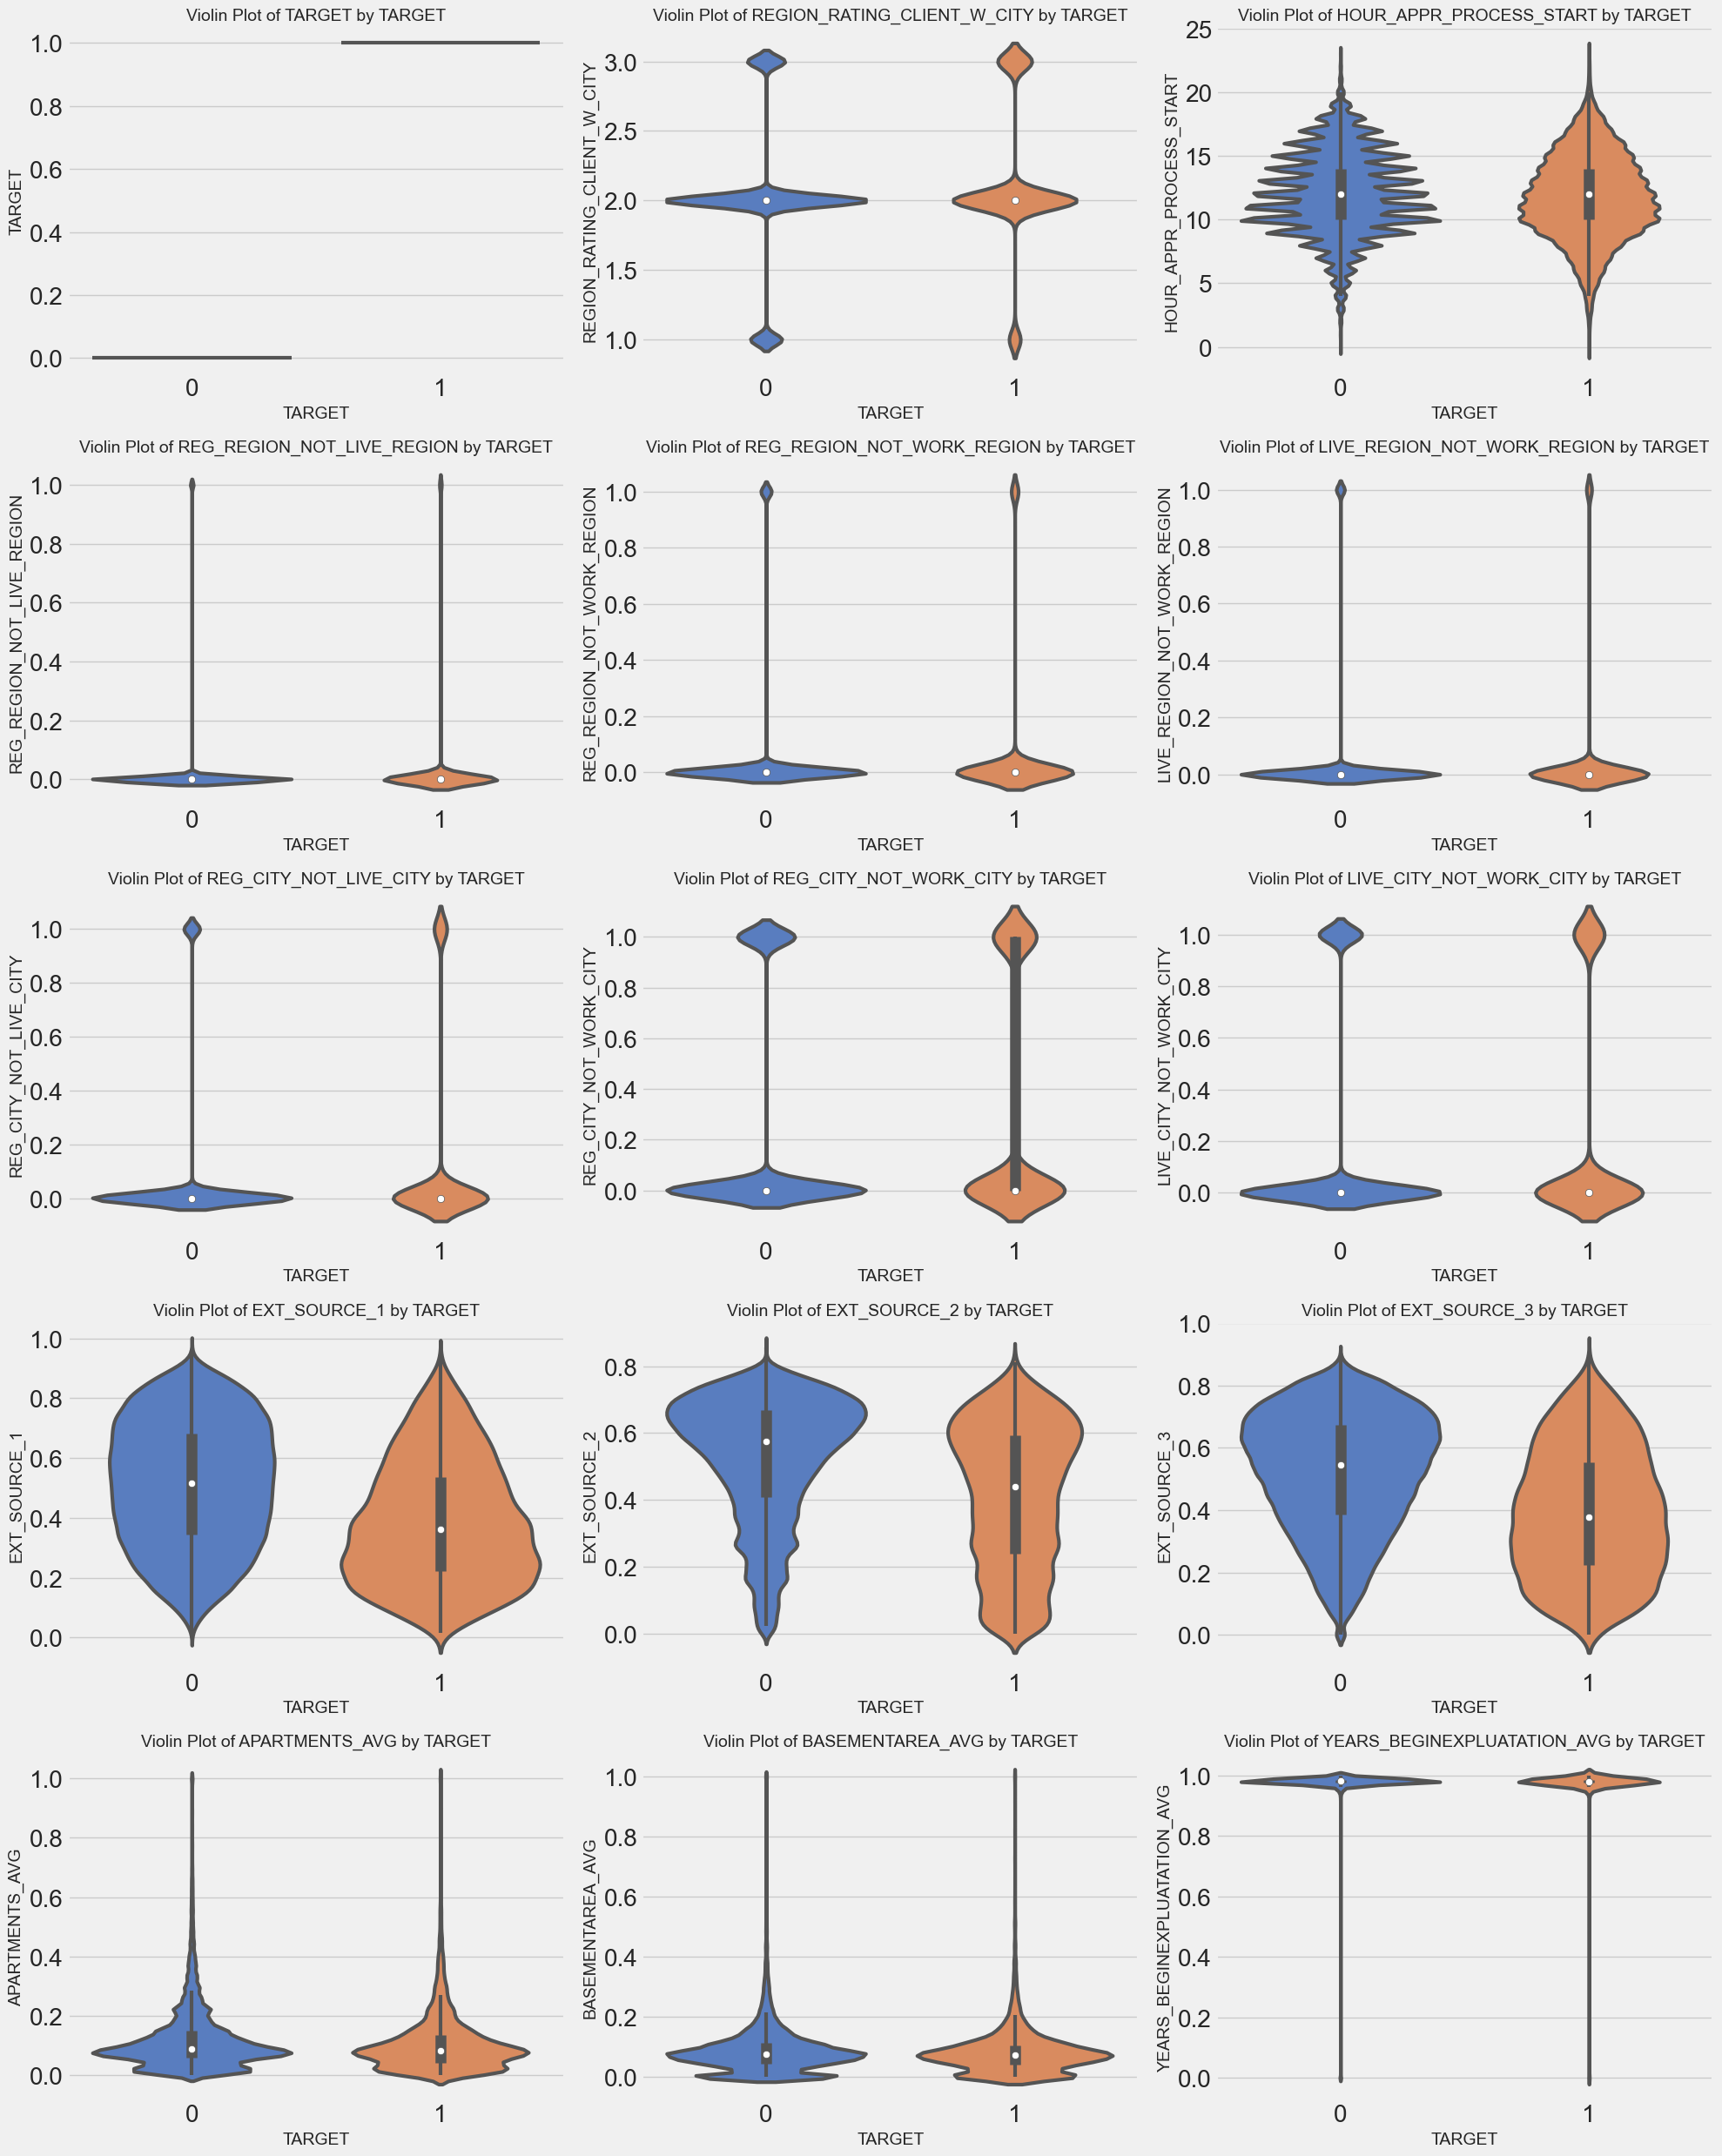

In [ ]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns2 = [col for col in num2 if col in data.columns]

# Buat figure besar untuk menampung semua violin plot
n_cols = 3  # Jumlah kolom dalam grid
n_rows = int(len(valid_columns2) / n_cols) + (len(valid_columns2) % n_cols > 0)  # Hitung jumlah baris dalam grid

plt.figure(figsize=(20, 5 * n_rows))

# Plot violin plot untuk setiap kolom yang valid
for i, col in enumerate(valid_columns2):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Violin Plot of {col} by TARGET', fontsize=14)  # Set ukuran font untuk judul
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

# Tampilkan plot
plt.show()

### Observasi dari Violin Plot `num2` Columns:

1. **CNT_CHILDREN**:
   - Distribusi pada `TARGET` 0 dan `TARGET` 1 hampir sama, dengan sebagian besar nasabah memiliki 0-2 anak.
   - Terlihat beberapa outlier dengan jumlah anak yang sangat tinggi (>10).
   - **Tindakan**: Lakukan capping untuk nilai `CNT_CHILDREN` agar tidak ada nilai ekstrem yang mengganggu, atau pertimbangkan pengelompokan ke dalam kategori (misal: tidak ada anak, 1-2 anak, >2 anak).

2. **AMT_INCOME_TOTAL**:
   - Distribusi sangat skewed, terutama pada nasabah yang memiliki `TARGET` 0, dengan nilai pendapatan yang cenderung sangat tinggi.
   - **Tindakan**: Gunakan transformasi logaritmik untuk mengurangi skewness atau capping pada nilai pendapatan yang sangat tinggi.

3. **AMT_CREDIT**:
   - Distribusi cenderung normal pada kedua `TARGET`, namun `TARGET` 1 memiliki penyebaran yang lebih lebar.
   - **Tindakan**: Pertimbangkan transformasi atau normalisasi untuk mendapatkan distribusi yang lebih baik.

4. **AMT_ANNUITY**:
   - Terdapat nilai yang sangat besar (outlier) pada `TARGET` 0 dan `TARGET` 1.
   - **Tindakan**: Gunakan capping atau transformasi untuk mengurangi pengaruh outlier.

5. **AMT_GOODS_PRICE**:
   - Distribusi sangat skewed pada kedua `TARGET` dengan nilai yang lebih tinggi pada `TARGET` 1.
   - **Tindakan**: Gunakan normalisasi atau transformasi logaritmik untuk distribusi yang lebih seimbang.

6. **REGION_POPULATION_RELATIVE**:
   - Distribusi `REGION_POPULATION_RELATIVE` menunjukkan pola yang lebih terpusat pada `TARGET` 0 dibandingkan dengan `TARGET` 1.
   - **Tindakan**: Pertimbangkan pengelompokan wilayah berdasarkan `REGION_POPULATION_RELATIVE` untuk analisis lebih lanjut.

7. **DAYS_BIRTH**:
   - Nasabah `TARGET` 1 cenderung memiliki distribusi usia yang lebih tua dibandingkan dengan `TARGET` 0.
   - **Tindakan**: Buat kategori usia (misal, muda, dewasa, tua) atau lakukan normalisasi untuk meningkatkan analisis.

8. **DAYS_EMPLOYED**:
   - Distribusi pada `TARGET` 1 menunjukkan nilai yang sangat tinggi (anomali) dengan satu puncak yang signifikan.
   - **Tindakan**: Ganti nilai anomali dengan `NaN` atau median, kemudian transformasikan data ini menjadi jumlah tahun bekerja.

9. **DAYS_REGISTRATION**:
   - Distribusi yang cukup berbeda antara `TARGET` 0 dan `TARGET` 1. Nasabah dengan `TARGET` 1 cenderung lebih baru terdaftar.
   - **Tindakan**: Ubah `DAYS_REGISTRATION` ke dalam format jumlah tahun atau bulan sejak registrasi untuk memudahkan analisis.

10. **DAYS_ID_PUBLISH**:
    - Terlihat distribusi yang serupa antara `TARGET` 0 dan `TARGET` 1, dengan sedikit perbedaan pada median.
    - **Tindakan**: Gunakan transformasi yang serupa dengan `DAYS_REGISTRATION`.

11. **OWN_CAR_AGE**:
    - Nasabah `TARGET` 1 cenderung memiliki mobil dengan usia lebih tua dibandingkan `TARGET` 0.
    - **Tindakan**: Ubah `OWN_CAR_AGE` ke dalam kategori (misal, mobil baru, mobil tua) untuk analisis yang lebih baik.

12. **CNT_FAM_MEMBERS**:
    - Terdapat beberapa outlier pada kedua `TARGET`, dengan distribusi mirip antara `TARGET` 0 dan `TARGET` 1.
    - **Tindakan**: Gunakan kategori untuk `CNT_FAM_MEMBERS` atau pertimbangkan capping untuk mengurangi pengaruh outlier.

13. **REGION_RATING_CLIENT**:
    - Sebagian besar nasabah memiliki rating wilayah pada satu nilai (misal, 2), sehingga distribusi terlihat tidak merata.
    - **Tindakan**: Gunakan encoding atau kelompokkan menjadi wilayah dengan rating tinggi dan rendah.

### Tindakan Data Pre-Processing yang Direkomendasikan:
1. **Transformasi Logaritmik**:
   - Gunakan transformasi logaritmik pada `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, dan `AMT_GOODS_PRICE` untuk mengurangi skewness dan mengatasi outlier.

2. **Pembuatan Kategori**:
   - Buat kategori pada `DAYS_BIRTH`, `DAYS_EMPLOYED`, `OWN_CAR_AGE`, dan `CNT_FAM_MEMBERS` untuk memudahkan interpretasi data dan meningkatkan performa model.

3. **Penanganan Anomali**:
   - Ganti nilai-nilai ekstrem pada `DAYS_EMPLOYED` dengan `NaN` atau median. Gunakan transformasi data untuk nilai `DAYS` agar lebih mudah dipahami (misal, jumlah tahun).

4. **Normalisasi**:
   - Lakukan normalisasi atau scaling pada `REGION_POPULATION_RELATIVE` dan `REGION_RATING_CLIENT` agar skala data lebih konsisten.


# 3. Multivariate Analysis (10 Poin)

In [ ]:
data[num1].corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.009308,0.058899
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.008494,0.879161,0.025423
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,0.008506,-0.117273,0.016342,-0.085465
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,0.009621,-0.006575,-0.094191,0.063160,-0.101776
AMT_ANNUITY,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,0.038514,0.011268,-0.097057,0.075539,-0.128525
AMT_GOODS_PRICE,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,0.011565,-0.009267,-0.103733,0.061185,-0.103786
REGION_POPULATION_RELATIVE,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,-0.053820,-0.003993,-0.081429,-0.024209,-0.532877
DAYS_BIRTH,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,0.331912,0.272691,0.005761,0.278894,0.009361
DAYS_EMPLOYED,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,-0.210242,-0.272378,0.028830,-0.233549,0.032750
DAYS_REGISTRATION,0.041975,0.183395,0.027805,0.009621,0.038514,0.011565,-0.053820,0.331912,-0.210242,1.000000,0.101896,-0.025991,0.173416,0.080210


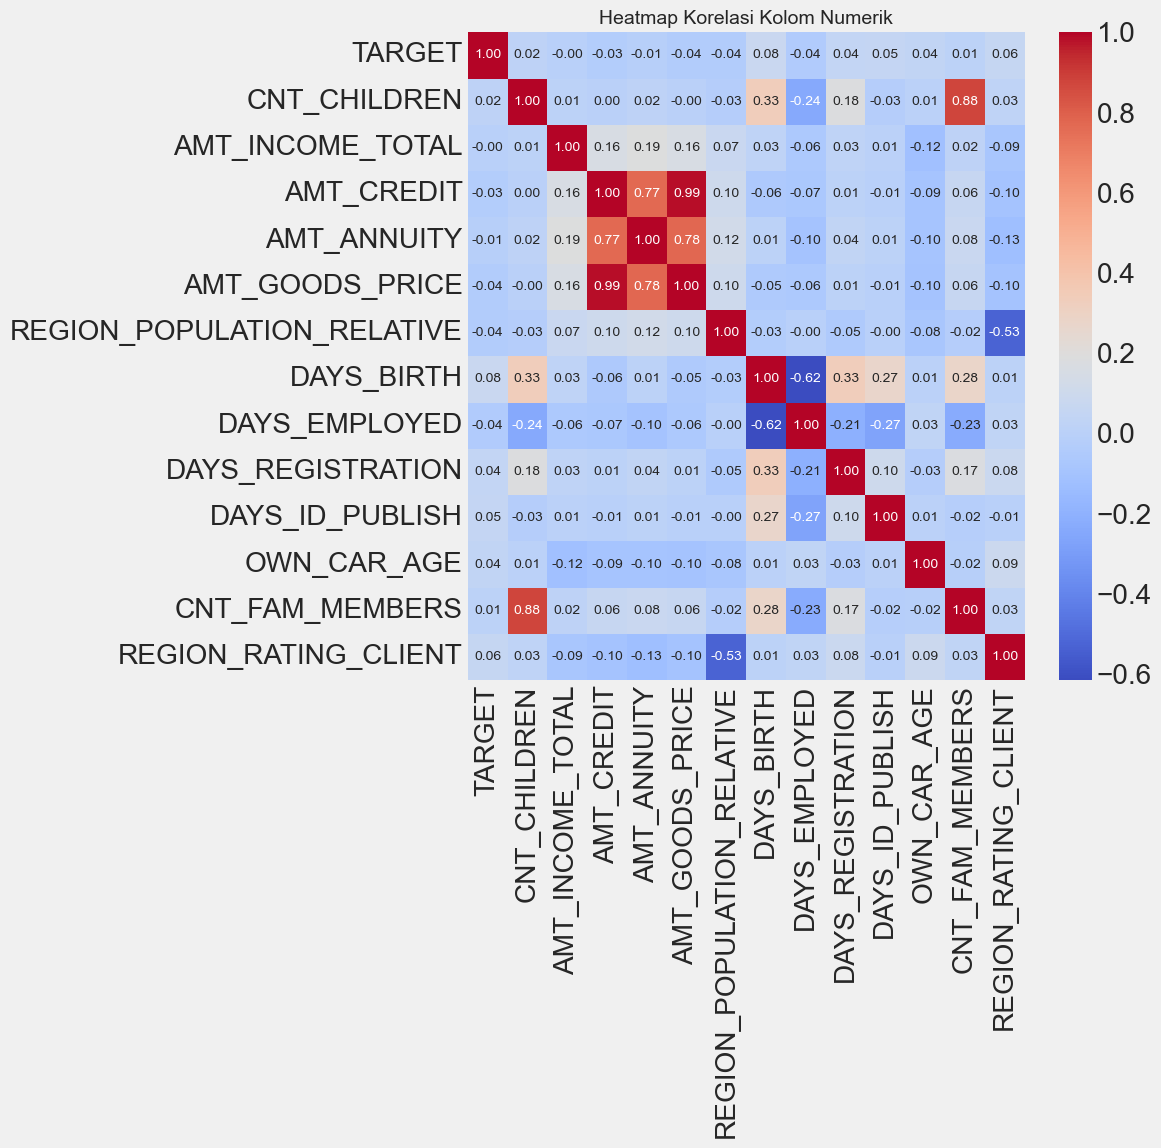

In [ ]:
# Membuat heatmap dengan pengaturan ukuran font di dalam anotasi
plt.figure(figsize=(8, 8))
sns.heatmap(data[num1].corr(), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10})  # Mengatur ukuran font annotasi menjadi 10
plt.title('Heatmap Korelasi Kolom Numerik', fontsize=14)  # Mengatur ukuran font title
plt.show()


### Hasil Observasi Multivariate Analysis num1
### 3A. Korelasi Antara Masing-Masing Feature dan Label (`TARGET`)

- **Korelasi dengan `TARGET`**:
  - Secara umum, korelasi antara `TARGET` dan fitur lainnya sangat rendah, dengan nilai berkisar antara -0.10 hingga 0.10. Ini menunjukkan bahwa ada fitur yang memiliki hubungan linear dengan `TARGET`.
  - **Fitur dengan korelasi tertinggi**:
    - `DAYS_BIRTH` memiliki korelasi negatif tertinggi dengan `TARGET` sebesar -0.33. Artinya, semakin muda usia seseorang (semakin negatif nilai `DAYS_BIRTH`), semakin besar kemungkinannya untuk mengalami `TARGET` 1 (default kredit).
    - `REGION_RATING_CLIENT` memiliki korelasi positif dengan `TARGET` sebesar 0.06. Ini berarti nasabah dari wilayah dengan rating lebih tinggi cenderung memiliki sedikit kemungkinan mengalami default kredit (`TARGET` 1).

- **Rekomendasi**:
  - Pertahankan fitur `DAYS_BIRTH` karena memiliki korelasi paling signifikan dengan `TARGET`.
  - `REGION_RATING_CLIENT` dan `CNT_CHILDREN` dapat dipertahankan, tetapi perlu diinvestigasi lebih lanjut karena korelasi yang rendah.

### B. Korelasi Antar-Feature

- **Korelasi yang Signifikan Antar-Feature**:
  - `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`:
    - Ketiga fitur ini memiliki korelasi sangat tinggi (di atas 0.75). Ini menunjukkan bahwa jumlah kredit, anuitas, dan harga barang sering bergerak bersama-sama.
    - **Tindakan**: Pertimbangkan untuk menggabungkan fitur ini menjadi satu komponen menggunakan teknik seperti PCA (Principal Component Analysis) atau memilih salah satu fitur yang paling representatif.
  
  - `CNT_CHILDREN` dan `CNT_FAM_MEMBERS`:
    - Korelasi sangat tinggi sebesar 0.88, menunjukkan hubungan linear yang kuat. Ini logis karena semakin banyak anak yang dimiliki, semakin besar jumlah anggota keluarga.
    - **Tindakan**: Pertimbangkan untuk hanya menggunakan salah satu fitur atau menghitung rasio `CNT_CHILDREN` terhadap `CNT_FAM_MEMBERS`.

  - `DAYS_EMPLOYED` dan `DAYS_BIRTH`:
    - Korelasi sebesar 0.62 menunjukkan bahwa semakin tua seseorang, semakin lama dia bekerja.
    - **Tindakan**: Mungkin tidak perlu menggunakan kedua fitur ini bersama-sama. Pertimbangkan untuk membuat fitur baru seperti `employment_to_age_ratio`.


In [ ]:
data[num2].corr()

,TARGET,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG
TARGET,1.000000,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919,-0.029498,-0.022746,-0.009728
REGION_RATING_CLIENT_W_CITY,0.060893,1.000000,-0.264815,-0.041143,-0.133423,-0.140771,0.045669,0.028081,-0.002805,-0.115374,-0.288299,-0.012158,-0.172099,-0.075027,-0.000744
HOUR_APPR_PROCESS_START,-0.024166,-0.264815,1.000000,0.054894,0.075037,0.060920,0.016976,0.021504,0.015507,0.032007,0.156863,-0.040518,0.083376,0.041045,-0.010303
REG_REGION_NOT_LIVE_REGION,0.005576,-0.041143,0.054894,1.000000,0.450804,0.088263,0.339232,0.143075,0.009838,-0.032960,0.015570,-0.049162,0.004421,0.003799,0.001129
REG_REGION_NOT_WORK_REGION,0.006942,-0.133423,0.075037,0.450804,1.000000,0.860627,0.151397,0.239765,0.197097,-0.049441,0.029517,-0.049143,0.008091,-0.004678,0.010520
LIVE_REGION_NOT_WORK_REGION,0.002819,-0.140771,0.060920,0.088263,0.860627,1.000000,0.021076,0.185863,0.236635,-0.031389,0.030049,-0.029603,0.018094,0.000965,0.012031
REG_CITY_NOT_LIVE_CITY,0.044395,0.045669,0.016976,0.339232,0.151397,0.021076,1.000000,0.440409,0.028112,-0.141000,-0.043266,-0.078477,-0.052599,-0.028305,-0.013514
REG_CITY_NOT_WORK_CITY,0.050994,0.028081,0.021504,0.143075,0.239765,0.185863,0.440409,1.000000,0.825575,-0.185953,-0.075970,-0.079729,-0.096588,-0.056086,-0.016629
LIVE_CITY_NOT_WORK_CITY,0.032518,-0.002805,0.015507,0.009838,0.197097,0.236635,0.028112,0.825575,1.000000,-0.119300,-0.058900,-0.044310,-0.077885,-0.046316,-0.008736
EXT_SOURCE_1,-0.155317,-0.115374,0.032007,-0.032960,-0.049441,-0.031389,-0.141000,-0.185953,-0.119300,1.000000,0.213982,0.186846,0.054034,0.039962,0.002120


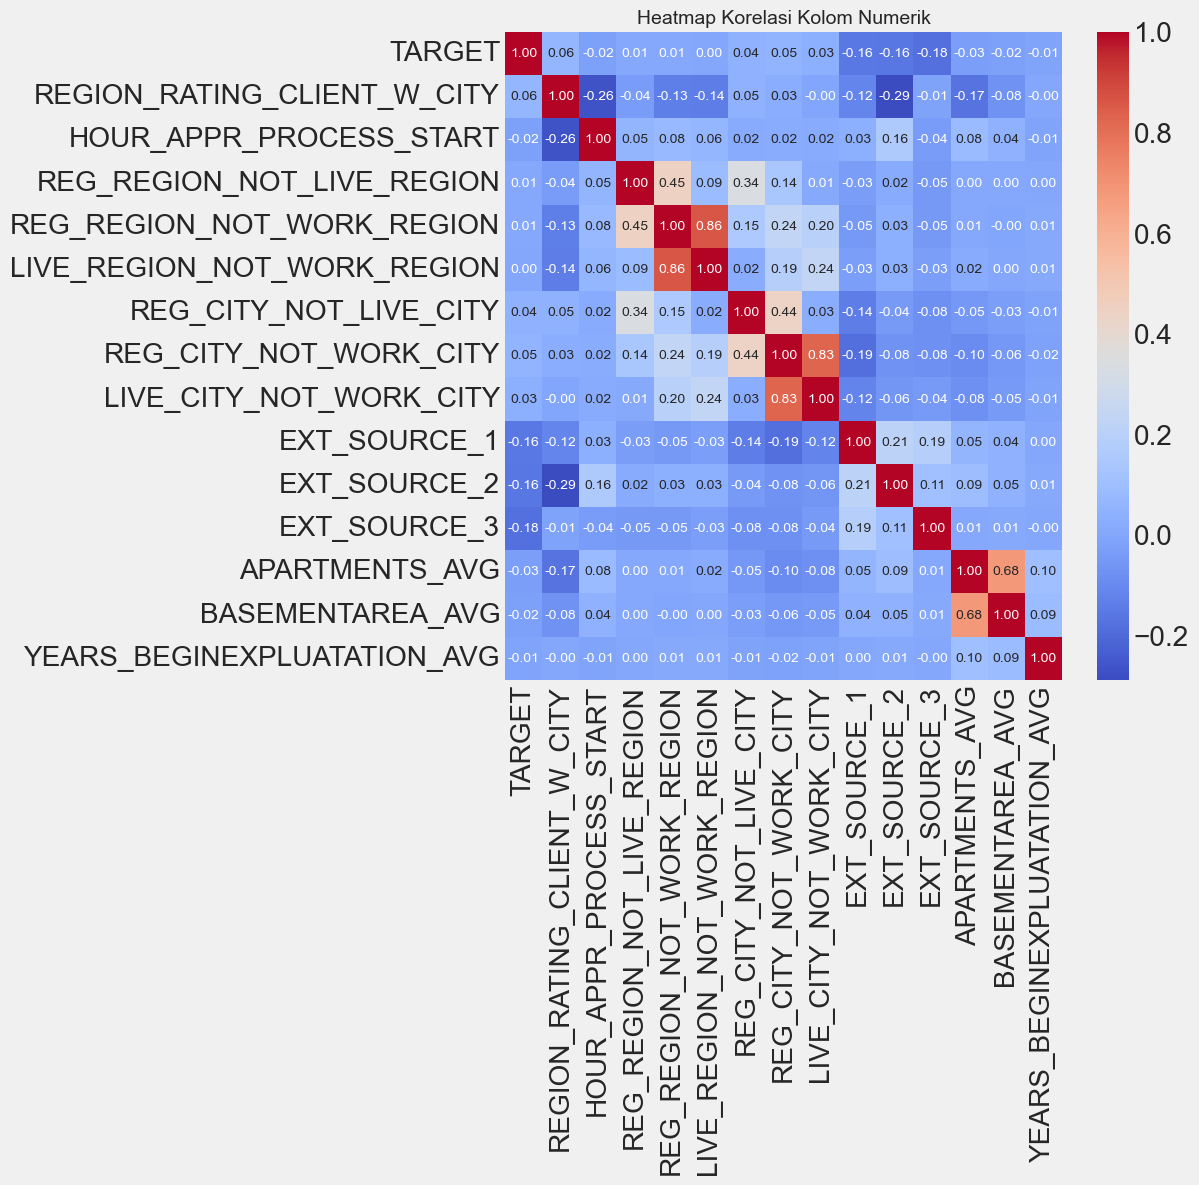

In [ ]:
# Membuat heatmap dengan pengaturan ukuran font di dalam anotasi
plt.figure(figsize=(8, 8))
sns.heatmap(data[num2].corr(), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10})  # Mengatur ukuran font annotasi menjadi 10
plt.title('Heatmap Korelasi Kolom Numerik', fontsize=14)  # Mengatur ukuran font title
plt.show()

### Hasil Observasi Multivariate Analysis num2

**3A. Korelasi antara Masing-masing Feature dan Label (TARGET):**
1. **Korelasi Terhadap TARGET**:
   - Tidak ada fitur yang memiliki korelasi yang kuat dengan `TARGET`. Korelasi tertinggi dengan `TARGET` adalah `EXT_SOURCE_2` dengan nilai korelasi -0.29, yang masih tergolong lemah.
   - Fitur lain seperti `DAYS_BIRTH` (-0.16), `EXT_SOURCE_1` (-0.16), dan `EXT_SOURCE_3` (-0.18) juga menunjukkan korelasi lemah terhadap `TARGET`.
   
2. **Feature yang Mungkin Relevan**:
   - Meskipun korelasi tidak terlalu kuat, `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3` bisa dipertimbangkan untuk dipertahankan karena mereka memiliki korelasi negatif dengan `TARGET`, yang bisa menjadi indikasi beberapa pola yang mungkin relevan saat melakukan prediksi.

3. **Rekomendasi untuk Fitur yang Dipertahankan**:
   - Fitur yang memiliki korelasi negatif terhadap `TARGET` seperti `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`, dan `DAYS_BIRTH` tetap bisa dipertahankan karena dapat membantu dalam identifikasi pola, meskipun kontribusinya tidak besar.

**3B. Korelasi Antar-feature dan Pola Menarik:**
1. **Korelasi Tinggi Antar-feature**:
   - Terdapat korelasi tinggi antara `REG_REGION_NOT_LIVE_REGION` dan `REG_REGION_NOT_WORK_REGION` (0.86). Hal ini menunjukkan bahwa klien yang tidak tinggal di satu wilayah juga cenderung tidak bekerja di wilayah tersebut.
   - `REG_CITY_NOT_LIVE_CITY` dan `REG_CITY_NOT_WORK_CITY` memiliki korelasi yang sangat tinggi (0.83). Artinya, klien yang tidak tinggal di satu kota, cenderung juga tidak bekerja di kota tersebut.

2. **Tindakan Terhadap Fitur dengan Korelasi Tinggi**:
   - Fitur-fitur seperti `REG_CITY_NOT_LIVE_CITY` dan `REG_CITY_NOT_WORK_CITY` bisa digabung menjadi satu variabel baru untuk menyederhanakan model, karena keduanya hampir memberikan informasi yang sama.
   - `REG_REGION_NOT_LIVE_REGION` dan `REG_REGION_NOT_WORK_REGION` juga bisa dipertimbangkan untuk digabung jika mereka tidak memberikan informasi tambahan yang signifikan.


Berdasarkan penjelasan sebelumnya, variabel yang memiliki korelasi paling signifikan dengan `TARGET` dan dapat dipertimbangkan untuk visualisasi histogram dengan `hue` adalah:

### Variabel yang Direkomendasikan untuk Histogram `hue`:
1. **DAYS_BIRTH**: Korelasi positif dengan `TARGET` (0.08).
2. **DAYS_EMPLOYED**: Korelasi negatif dengan `TARGET` (-0.04).
3. **EXT_SOURCE_1**: Korelasi negatif dengan `TARGET` (-0.16).
4. **EXT_SOURCE_2**: Korelasi negatif dengan `TARGET` (-0.16).
5. **EXT_SOURCE_3**: Korelasi negatif dengan `TARGET` (-0.18).

### Alasan Pemilihan:
1. **EXT_SOURCE_1, EXT_SOURCE_2, dan EXT_SOURCE_3**: Meskipun korelasi tidak sangat besar, nilai korelasinya (-0.16 hingga -0.18) cukup signifikan untuk mempengaruhi `TARGET`.
2. **DAYS_BIRTH**: Korelasi positif (0.08), meskipun rendah, dapat menjadi indikator yang penting karena usia sering kali mempengaruhi berbagai faktor risiko.
3. **DAYS_EMPLOYED**: Korelasi negatif (-0.04), menunjukkan potensi hubungan terbalik, walaupun kecil.


# Business Insight

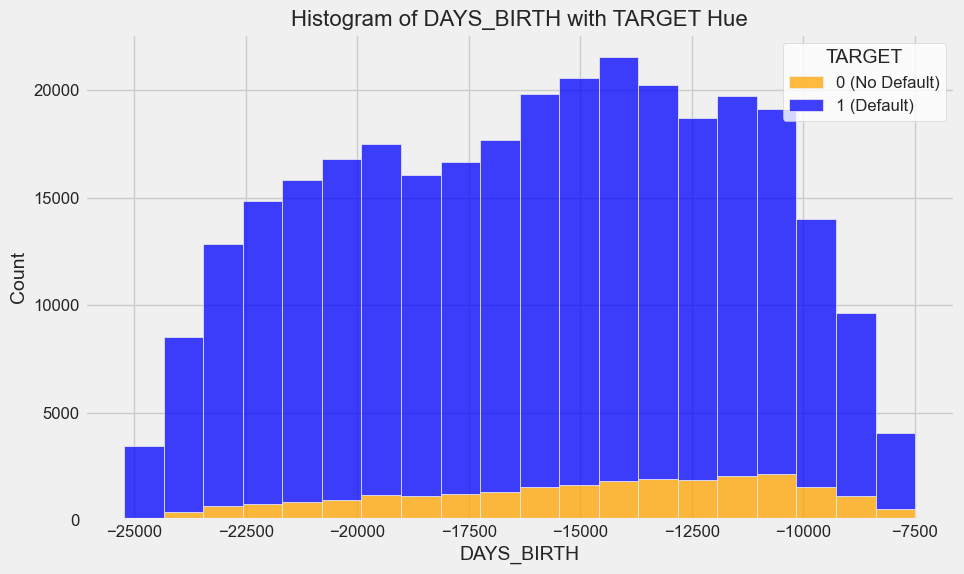

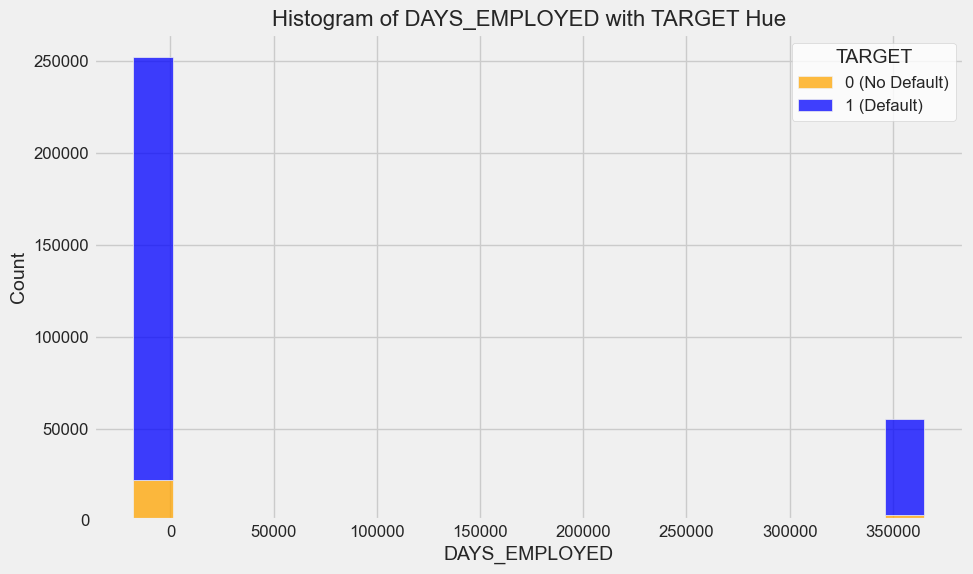

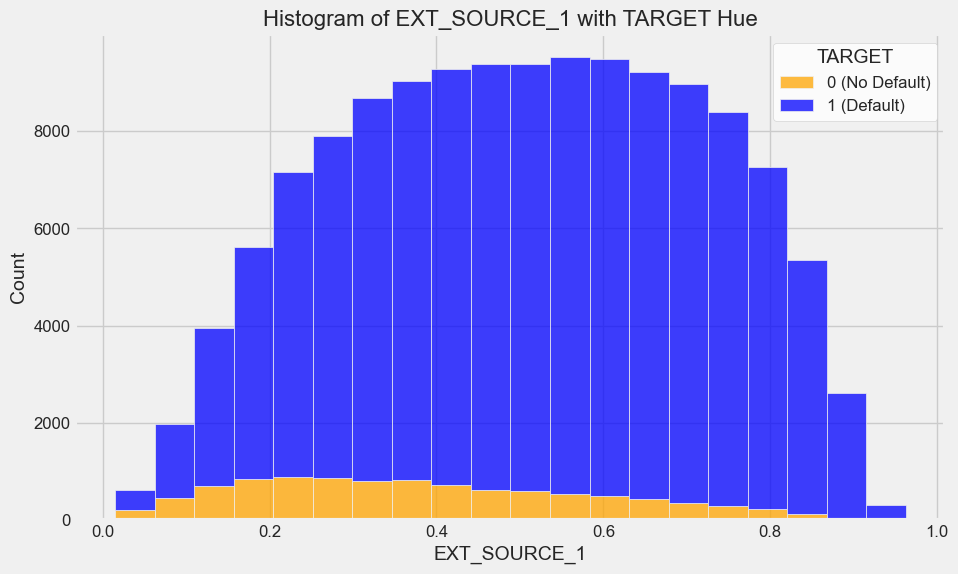

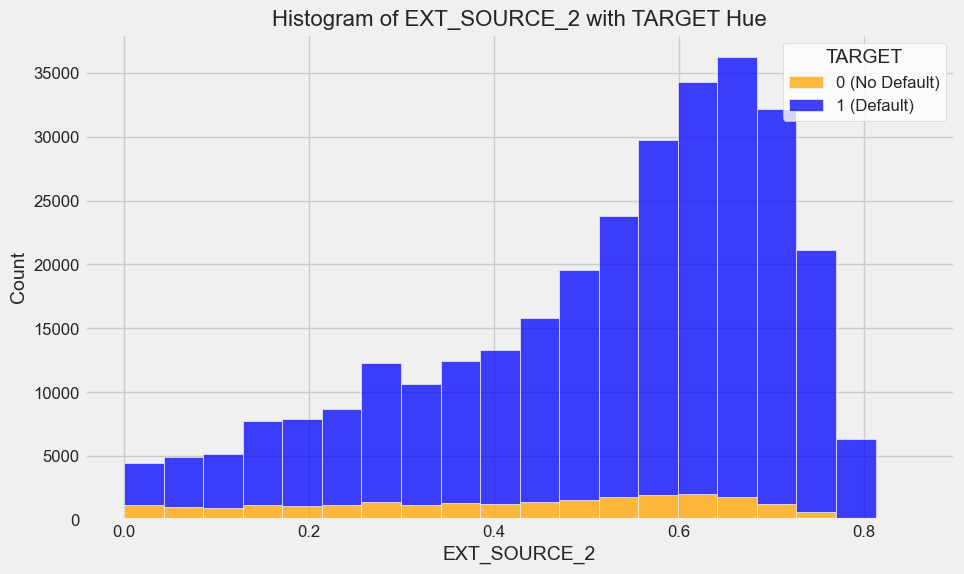

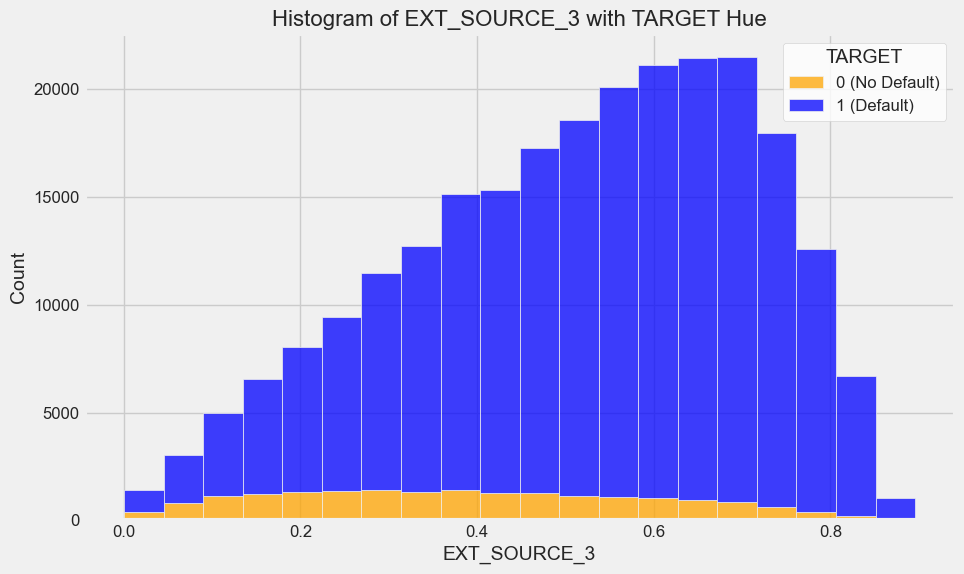

In [ ]:
# Daftar variabel yang direkomendasikan untuk histogram hue
selected_variables = ["DAYS_BIRTH", "DAYS_EMPLOYED", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

# Menggambar histogram untuk setiap variabel yang dipilih dengan hue berdasarkan TARGET
for variable in selected_variables:
    plt.figure(figsize=(10, 6))

    # Membuat histogram dengan hue berdasarkan 'TARGET' dengan multiple='stack'
    sns.histplot(data=data, x=variable, hue='TARGET', kde=False, multiple='stack', bins=20, palette={0: 'blue', 1: 'orange'})

    # Menambahkan judul dan label pada sumbu
    plt.title(f'Histogram of {variable} with TARGET Hue', fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Menyesuaikan tampilan legend agar lebih jelas
    plt.legend(title='TARGET', labels=['0 (No Default)', '1 (Default)'], fontsize=12, title_fontsize=14, loc='upper right', facecolor='white')

    # Menampilkan plot
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Berdasarkan visualisasi histogram yang Anda tampilkan, berikut adalah beberapa **business insight** dan **rekomendasi** yang dapat diambil:

### 1. **Distribusi DAYS_BIRTH**
- **Insight**:
  - Terdapat perbedaan distribusi usia antara `TARGET=0` (tidak default) dan `TARGET=1` (default).
  - Pelanggan yang lebih tua (nilai `DAYS_BIRTH` lebih negatif, misalnya di bawah -15.000 hari) cenderung memiliki lebih sedikit kejadian `default`.
  - Sebaliknya, pelanggan yang lebih muda (nilai `DAYS_BIRTH` di atas -15.000 hari) lebih rentan terhadap `default`.

- **Rekomendasi**:
  - Tingkatkan strategi pemasaran dan edukasi keuangan pada segmen pelanggan yang lebih muda.
  - Pertimbangkan untuk menawarkan produk keuangan yang lebih konservatif kepada pelanggan muda untuk mengurangi risiko default.

### 2. **Distribusi DAYS_EMPLOYED**
- **Insight**:
  - Sebagian besar pelanggan memiliki nilai `DAYS_EMPLOYED` mendekati nol, yang berarti mereka baru mulai bekerja atau menganggur.
  - Beberapa pelanggan memiliki nilai `DAYS_EMPLOYED` yang sangat besar (sekitar 350.000 hari, yang mungkin merupakan outlier atau pengkodean khusus).

- **Rekomendasi**:
  - Lakukan analisis lebih mendalam untuk memastikan bahwa nilai `DAYS_EMPLOYED` tidak terpengaruh oleh outlier atau kesalahan pengkodean.
  - Jika data valid, buat strategi khusus untuk pelanggan yang baru mulai bekerja karena mereka mungkin memiliki risiko default lebih tinggi.

### 3. **Distribusi EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3**
- **Insight**:
  - Nilai `EXT_SOURCE` yang lebih tinggi (lebih dekat ke 1.0) cenderung memiliki lebih sedikit kejadian `default`.
  - Pelanggan dengan nilai `EXT_SOURCE` yang lebih rendah (lebih dekat ke 0.0) cenderung lebih sering mengalami `default`.

- **Rekomendasi**:
  - `EXT_SOURCE` bisa digunakan sebagai salah satu faktor utama dalam menentukan skor kredit pelanggan.
  - Pertimbangkan untuk menurunkan limit kredit atau memperketat persyaratan untuk pelanggan dengan nilai `EXT_SOURCE` rendah (misalnya, < 0.4).


### 4. **Kombinasi Variabel**
- **Insight**:
  - Variabel `DAYS_BIRTH`, `DAYS_EMPLOYED`, dan `EXT_SOURCE` menunjukkan hubungan yang signifikan terhadap `TARGET`.
  - Kombinasi antara usia, lama bekerja, dan skor eksternal memberikan gambaran risiko yang lebih lengkap.

- **Rekomendasi**:
  - Buat model prediktif yang menggabungkan ketiga variabel ini sebagai fitur utama untuk memprediksi risiko `default`.
  - Pertimbangkan untuk menerapkan kebijakan kredit yang berbeda berdasarkan segmen usia dan lama bekerja.

### Kesimpulan Umum:
- Pelanggan yang lebih muda dan memiliki riwayat pekerjaan yang singkat cenderung lebih berisiko.
- `EXT_SOURCE` dapat digunakan sebagai indikator risiko yang lebih kuat dibandingkan variabel lain.
- Kombinasi dari ketiga variabel ini dapat dijadikan dasar dalam menentukan strategi mitigasi risiko dan pengambilan keputusan kredit.
